# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

### Problem definition

* Predict which booking is likely to be canceled.
* Identify factors that have a high influence on booking cancellations.
* Build a predictive model that can predict which booking is going to be canceled in advance
* Formulating profitable policies for cancellations and refunds

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# statistical libraries for Python
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# prediction libraries for Python
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    precision_recall_curve,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    roc_curve,
)

<IPython.core.display.Javascript object>

In [2]:
data = pd.read_csv(
    "C:\\Users\\Tayo Adeyo\\Downloads\\Module4_week2\\INNHotelsGroup.csv"
)

<IPython.core.display.Javascript object>

In [3]:
# creating a copy of the data so as not to make changes to the original data.
df = data.copy()

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [4]:
# Displaying the first few rows of the dataset
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


<IPython.core.display.Javascript object>

In [5]:
# Checking the shape of the dataset
df.shape

(36275, 19)

<IPython.core.display.Javascript object>

In [6]:
# Checking the data types of the columns for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

In [7]:
# Checking for duplicate entries
df.duplicated().value_counts()

False    36275
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
# Checking for missing entries in the dataset
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

In [9]:
# Statistical summary of the numerical columns of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


<IPython.core.display.Javascript object>

In [10]:
# Statistical summary of the categorical columns of the dataset
df.describe(include="object").T

,count,unique,top,freq
Booking_ID,36275,36275,INN00001,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


<IPython.core.display.Javascript object>

In [11]:
# The Booking_ID column contains all unique identifiers, We will drop it from the data set.
df = df.drop("Booking_ID", axis=1)

<IPython.core.display.Javascript object>

We need to change the data type of "required_car_parking_space" and "repeated_guest" from integer to object

In [12]:
df["required_car_parking_space"] = df["required_car_parking_space"].apply(
    lambda x: "Yes" if x == 1 else "No"
)

<IPython.core.display.Javascript object>

In [13]:
df["repeated_guest"] = df["repeated_guest"].apply(lambda x: "Yes" if x == 1 else "No")

<IPython.core.display.Javascript object>

In [14]:
# Displaying a few random rows of the dataset
df.sample(n=10, random_state=1)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
30392,1,0,1,0,Not Selected,No,Room_Type 1,53,2018,9,11,Online,No,0,0,94.32000,0,Not_Canceled
6685,2,0,1,2,Meal Plan 1,No,Room_Type 1,63,2018,4,22,Online,No,0,0,105.30000,1,Canceled
8369,2,0,2,3,Meal Plan 1,No,Room_Type 4,55,2018,9,11,Online,No,0,0,106.24000,0,Not_Canceled
2055,2,0,0,2,Not Selected,No,Room_Type 1,53,2017,12,29,Online,No,0,0,81.00000,1,Not_Canceled
10969,1,0,2,4,Meal Plan 1,No,Room_Type 1,245,2018,7,6,Offline,No,0,0,110.00000,0,Canceled
24881,2,0,3,7,Meal Plan 1,No,Room_Type 2,231,2018,8,1,Online,No,0,0,81.82000,2,Canceled
28658,2,0,0,3,Meal Plan 2,No,Room_Type 1,71,2018,5,10,Offline,No,0,0,126.00000,1,Not_Canceled
20853,2,0,1,2,Meal Plan 1,No,Room_Type 1,66,2017,10,9,Offline,No,0,0,75.00000,0,Canceled
8501,2,0,0,3,Meal Plan 1,No,Room_Type 2,40,2018,1,14,Online,No,0,0,77.55000,1,Not_Canceled
1942,2,0,0,2,Meal Plan 1,No,Room_Type 1,63,2018,8,9,Online,No,0,0,144.90000,2,Not_Canceled


<IPython.core.display.Javascript object>

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  object 
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

<IPython.core.display.Javascript object>

In [16]:
df.shape

(36275, 18)

<IPython.core.display.Javascript object>

In [17]:
cat_cols = df.select_dtypes(["object"]).columns
cat_cols

Index(['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
       'market_segment_type', 'repeated_guest', 'booking_status'],
      dtype='object')

<IPython.core.display.Javascript object>

In [18]:
# Display the unique values in each of the categorical data types
for col in cat_cols:
    print(df[col].value_counts())
    print("=" * 40, "\n")

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

No     35151
Yes     1124
Name: required_car_parking_space, dtype: int64

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

No     35345
Yes      930
Name: repeated_guest, dtype: int64

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64



<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate analysis

In [19]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 8), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,8))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 5))
    else:
        plt.figure(figsize=(n + 2, 5))

    plt.xticks(rotation=90, fontsize=12)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

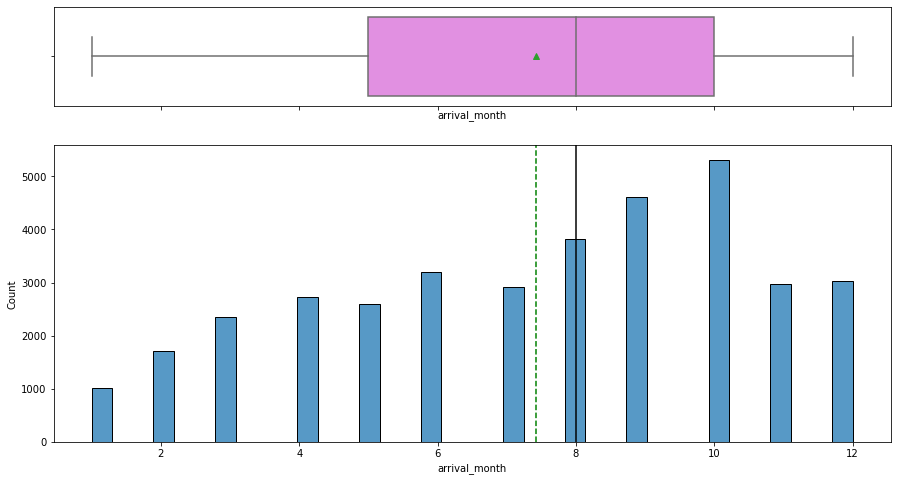

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(df, "arrival_month")

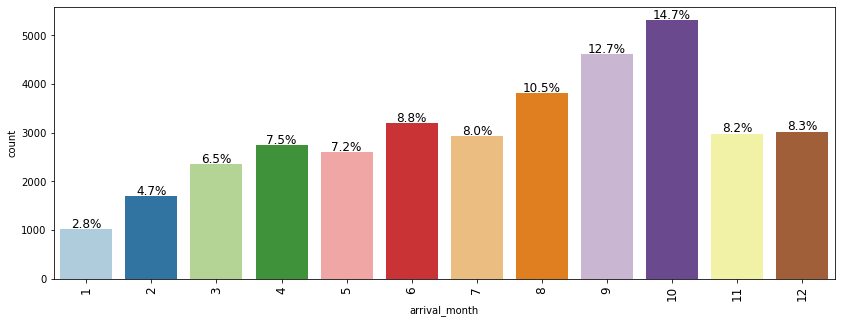

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(df, "arrival_month", perc=True, n=None)

#### Question #1- What are the busiest months in the hotel?
The busiest months in the hotel is October with 14.7% of the total bookings, followed by September and August with 12.7% and 10.5% of the total bookings respectively.

In [23]:
df.market_segment_type.value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

<IPython.core.display.Javascript object>

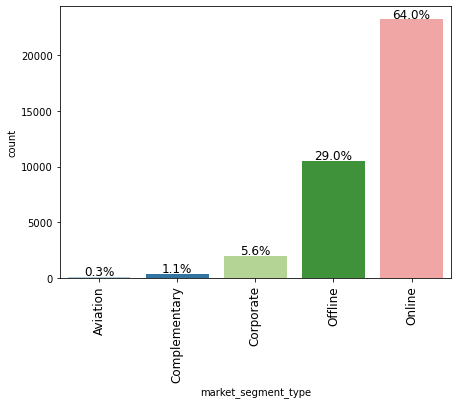

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(df, "market_segment_type", perc=True, n=None)

#### Question #2 - Which market segment do most of the guests come from?
Online market segment make up 64% of the guests, followed by the offline market segment which is responsible for another 29%  

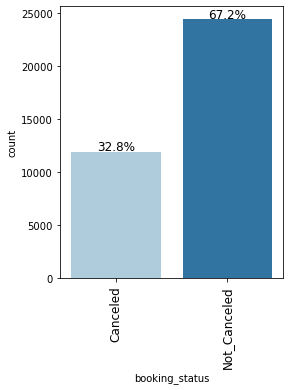

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(df, "booking_status", perc=True, n=None)

#### Question #4 - What percentage of bookings are canceled?

32.8% of bookings are cancelled

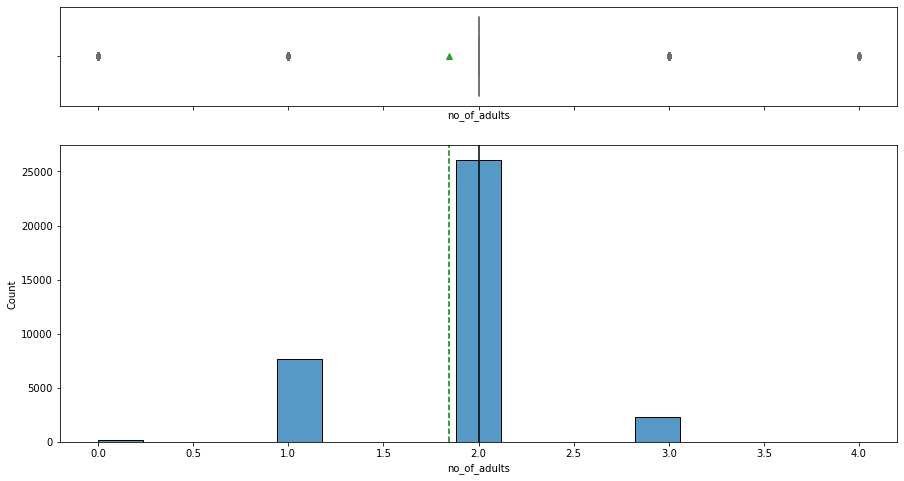

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(df, "no_of_adults")

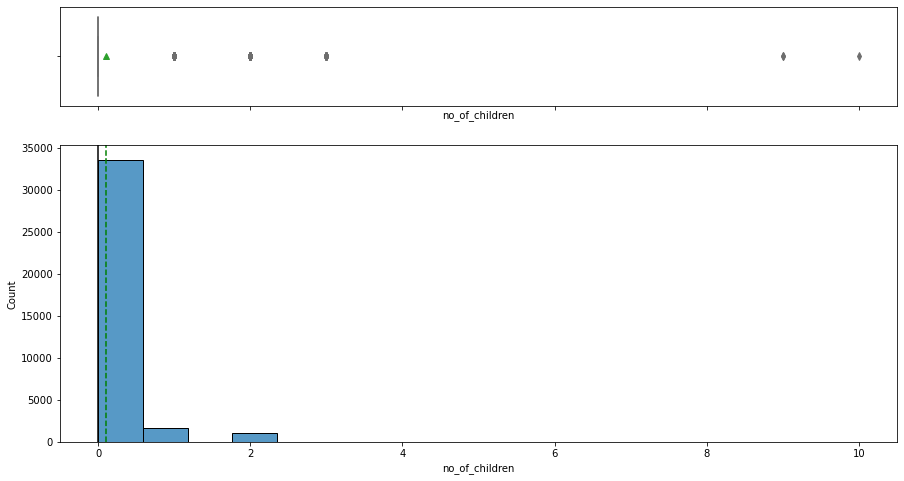

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(df, "no_of_children")

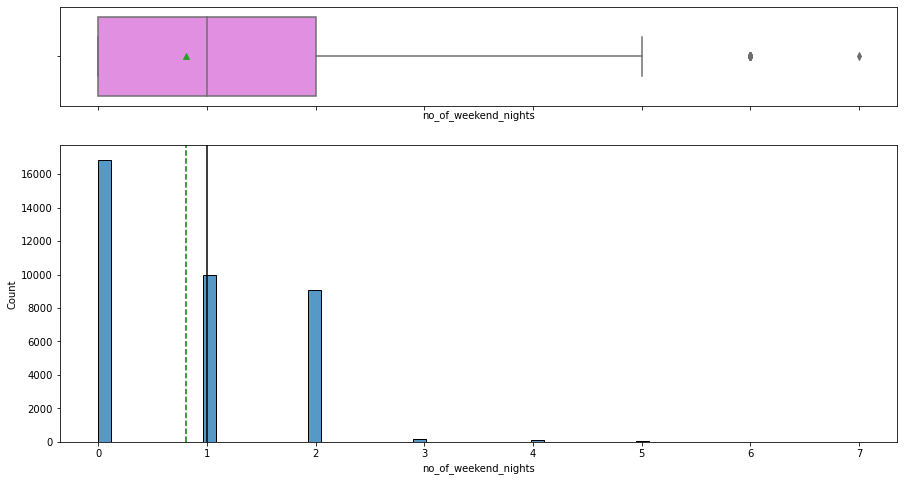

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(df, "no_of_weekend_nights")

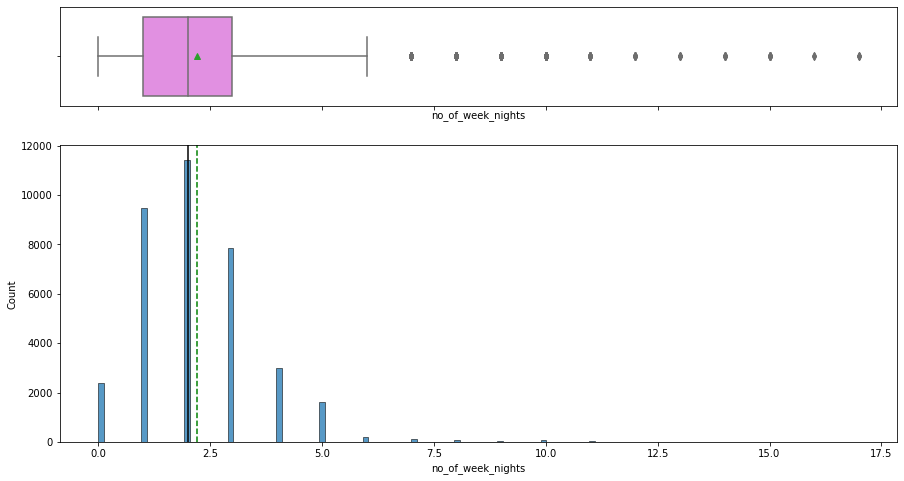

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(df, "no_of_week_nights")

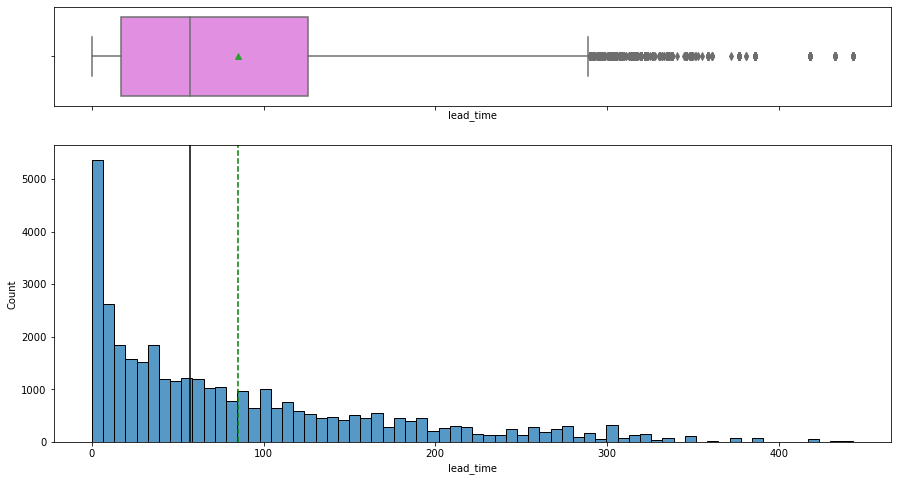

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(df, "lead_time")

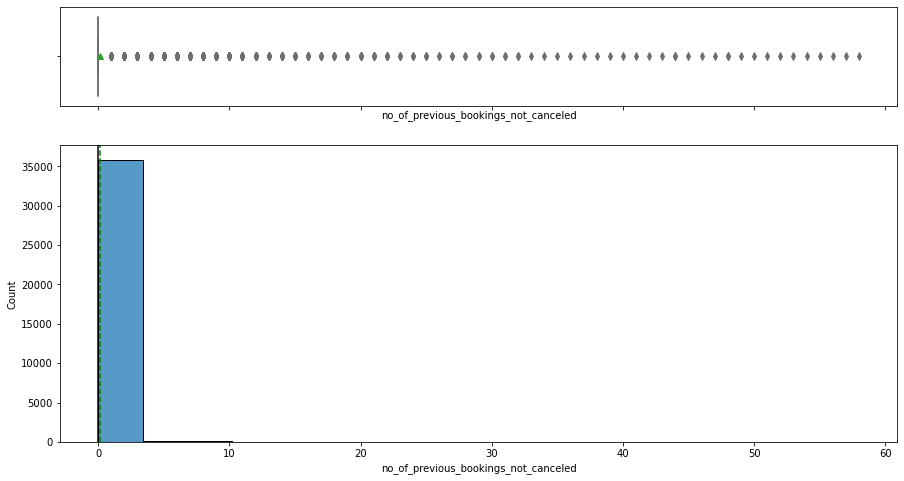

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(df, "no_of_previous_bookings_not_canceled")

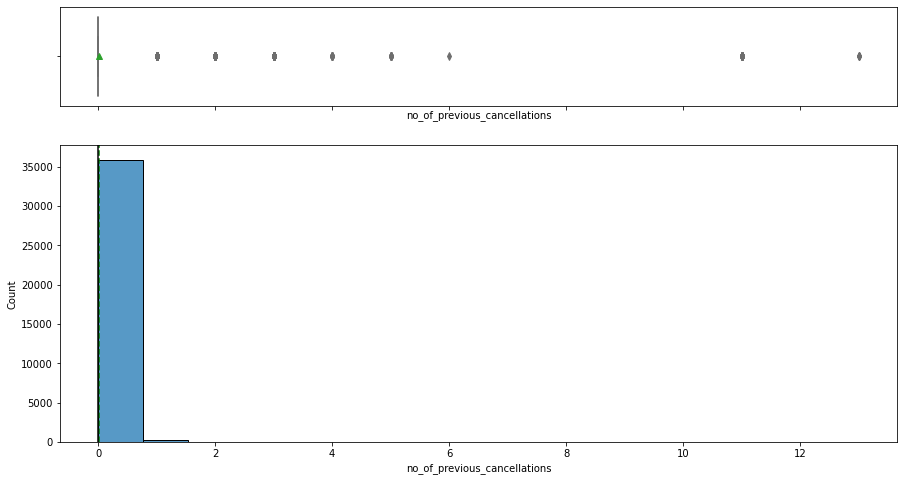

<IPython.core.display.Javascript object>

In [32]:
histogram_boxplot(df, "no_of_previous_cancellations")

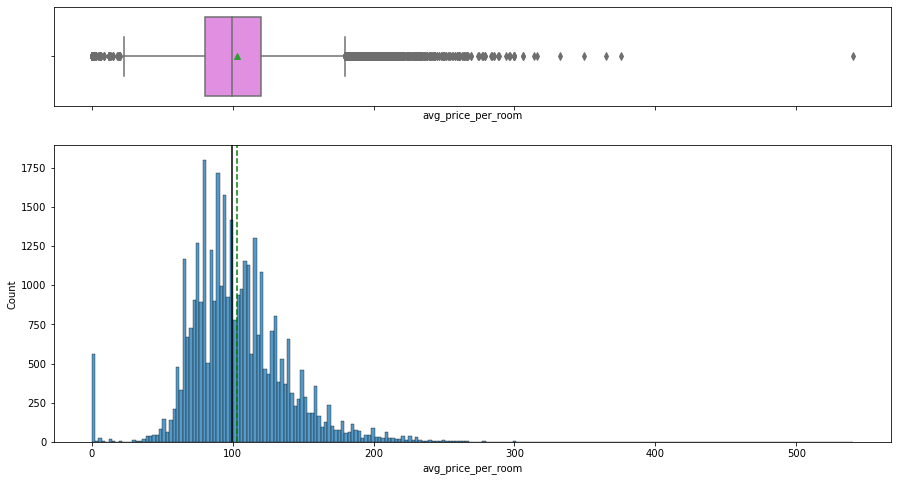

<IPython.core.display.Javascript object>

In [33]:
histogram_boxplot(df, "avg_price_per_room")

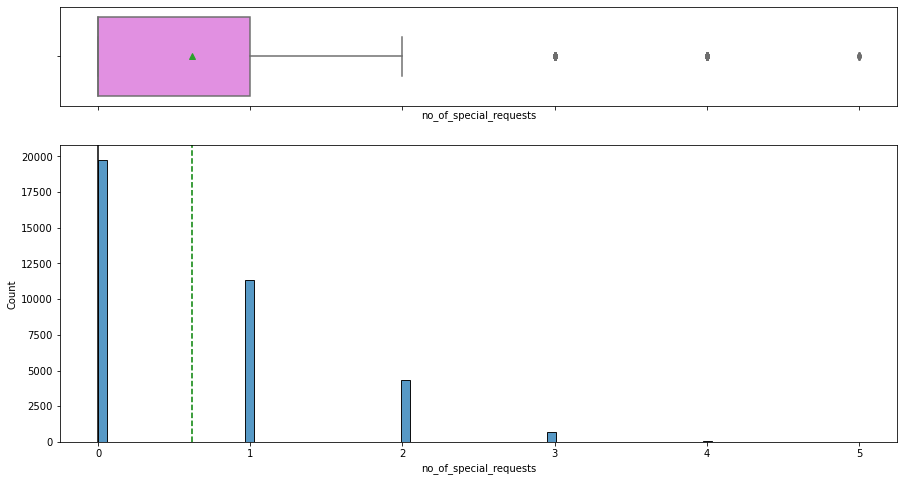

<IPython.core.display.Javascript object>

In [34]:
histogram_boxplot(df, "no_of_special_requests")

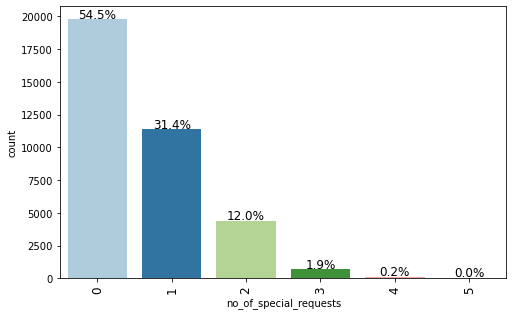

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(df, "no_of_special_requests", perc=True, n=None)

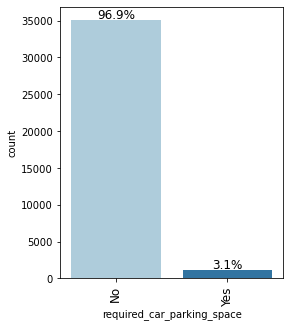

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(df, "required_car_parking_space", perc=True, n=None)

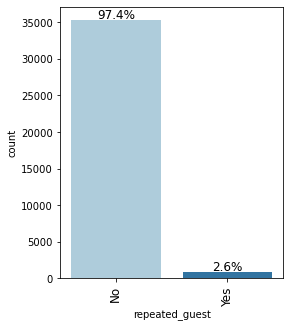

<IPython.core.display.Javascript object>

In [37]:
labeled_barplot(df, "repeated_guest", perc=True, n=None)

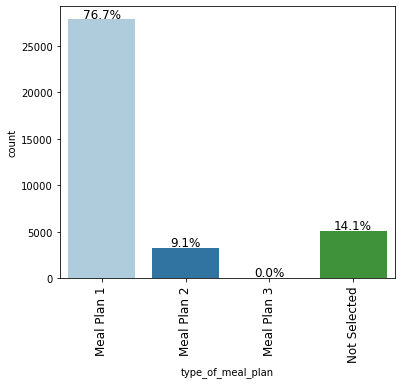

<IPython.core.display.Javascript object>

In [38]:
labeled_barplot(df, "type_of_meal_plan", perc=True, n=None)

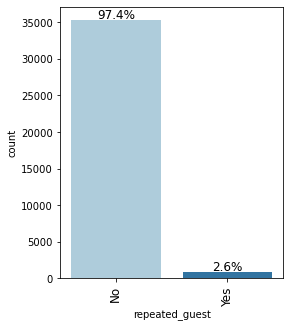

<IPython.core.display.Javascript object>

In [39]:
labeled_barplot(df, "repeated_guest", perc=True, n=None)

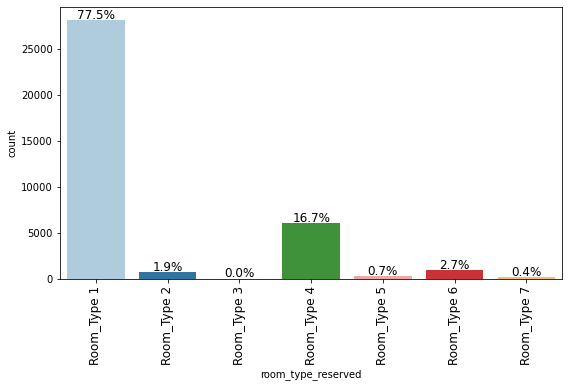

<IPython.core.display.Javascript object>

In [40]:
labeled_barplot(df, "room_type_reserved", perc=True, n=None)

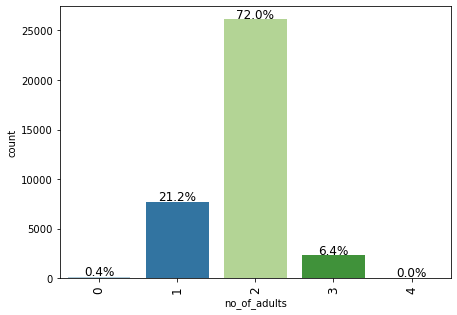

<IPython.core.display.Javascript object>

In [41]:
labeled_barplot(df, "no_of_adults", perc=True, n=None)

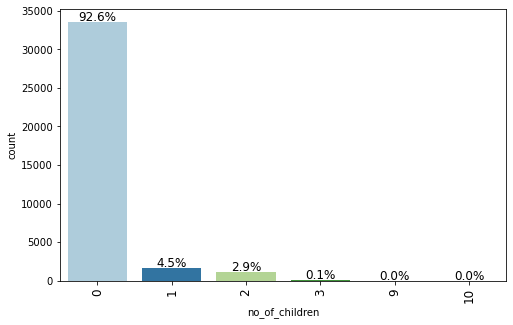

<IPython.core.display.Javascript object>

In [42]:
labeled_barplot(df, "no_of_children", perc=True, n=None)

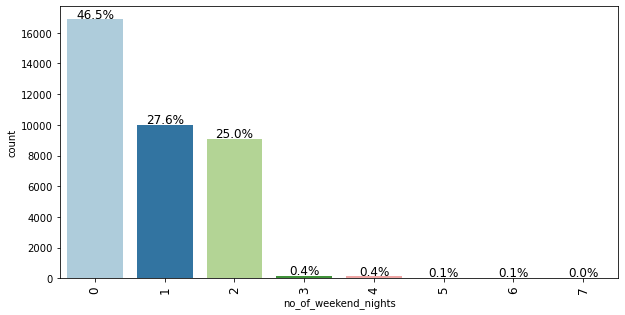

<IPython.core.display.Javascript object>

In [43]:
labeled_barplot(df, "no_of_weekend_nights", perc=True, n=None)

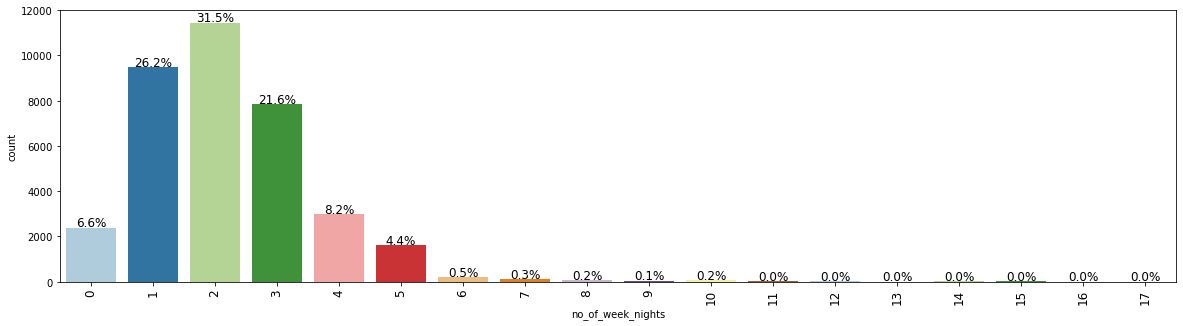

<IPython.core.display.Javascript object>

In [44]:
labeled_barplot(df, "no_of_week_nights", perc=True, n=None)

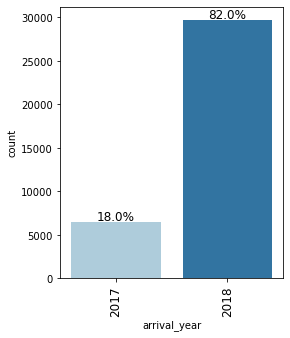

<IPython.core.display.Javascript object>

In [45]:
labeled_barplot(df, "arrival_year", perc=True, n=None)

### Bivariate Analysis

In [46]:
df["booking_status"] = df["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

<IPython.core.display.Javascript object>

In [47]:
col = df.select_dtypes([np.number]).columns
col

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

<IPython.core.display.Javascript object>

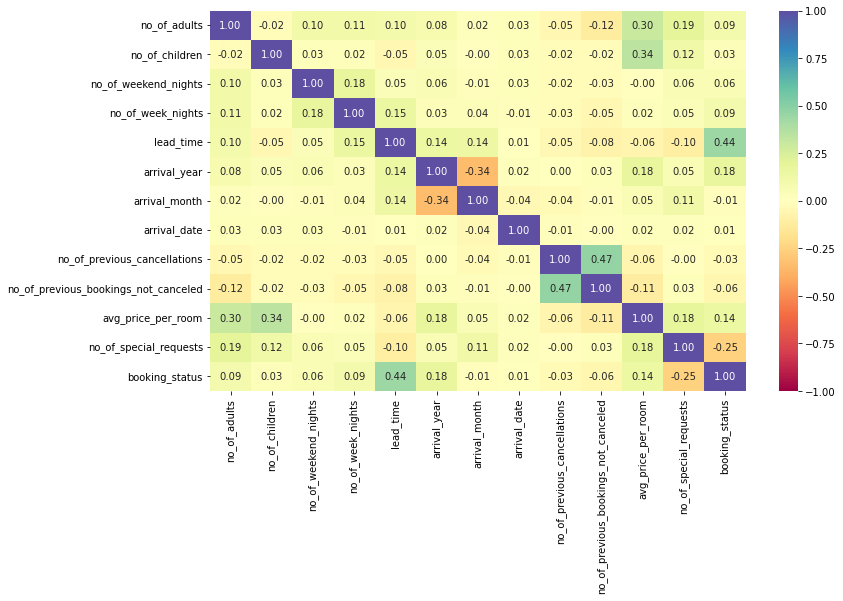

<IPython.core.display.Javascript object>

In [48]:
plt.figure(figsize=(12, 7))
sns.heatmap(df[col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [49]:
df.groupby("market_segment_type")["avg_price_per_room"].median()

market_segment_type
Aviation         95.00000
Complementary     0.00000
Corporate        79.00000
Offline          90.00000
Online          107.10000
Name: avg_price_per_room, dtype: float64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='market_segment_type', ylabel='avg_price_per_room'>

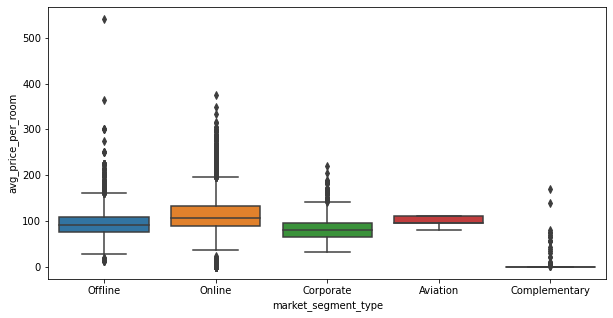

<IPython.core.display.Javascript object>

In [50]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df, x="market_segment_type", y="avg_price_per_room",
)

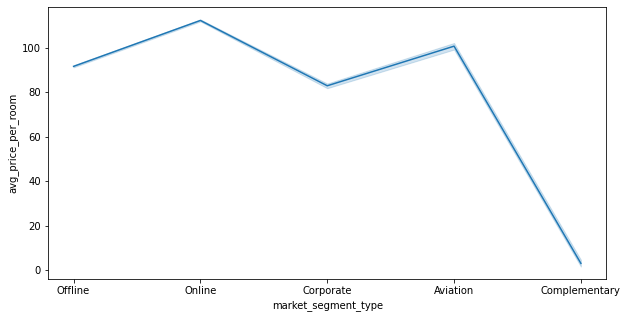

<IPython.core.display.Javascript object>

In [51]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x="market_segment_type", y="avg_price_per_room")
plt.show()

#### Question #3 - Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

Online bookings have the highest avg_price_per_room, followed by Aviation, Offline and Corporate with complimentary bringing up the rear

In [52]:
# Predefined "labelled_barplot" function modified to include the "hue" parameter

def labeled_barplot_mod(data, feature, hue, perc=False, n=None):
    """
    Barplot with percentage at the top, with hue parameter included

    data: dataframe
    feature: dataframe column
    hue: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 5))
    else:
        plt.figure(figsize=(n + 2, 5))

    plt.xticks(rotation=45, fontsize=12)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=hue,
        palette="CMRmap",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage


<IPython.core.display.Javascript object>

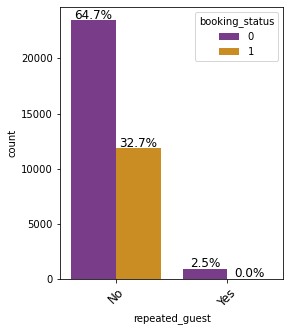

<IPython.core.display.Javascript object>

In [53]:
labeled_barplot_mod(df, "repeated_guest", hue="booking_status", perc=True, n=None)

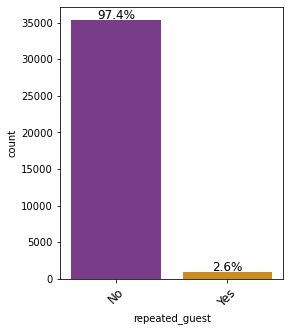

<IPython.core.display.Javascript object>

In [54]:
labeled_barplot_mod(df, "repeated_guest", hue=None, perc=True, n=None)

In [55]:
df.groupby("repeated_guest")["booking_status"].sum()

repeated_guest
No     11869
Yes       16
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

In [56]:
df.groupby("repeated_guest")["booking_status"].value_counts(normalize=True)

repeated_guest  booking_status
No              0                0.66420
                1                0.33580
Yes             0                0.98280
                1                0.01720
Name: booking_status, dtype: float64

<IPython.core.display.Javascript object>

In [57]:
df.groupby("repeated_guest")["booking_status"].value_counts()

repeated_guest  booking_status
No              0                 23476
                1                 11869
Yes             0                   914
                1                    16
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

#### Question #5 - Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

Repeating guests make up 2.6% of the total bookings (930 out of 36275). Out of this 930 bookings, 1.72%, that is 16 out of 930 cancel their bookings, wheras 33.58%, that is 11869 out of 35345 of bookins that were made by new guests are cancelled.

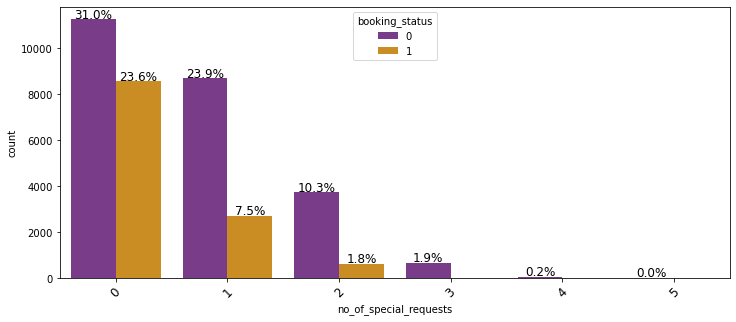

<IPython.core.display.Javascript object>

In [58]:
labeled_barplot_mod(df, "no_of_special_requests", hue="booking_status", perc=True, n=10)

In [59]:
df.groupby("no_of_special_requests")["booking_status"].value_counts()

no_of_special_requests  booking_status
0                       0                 11232
                        1                  8545
1                       0                  8670
                        1                  2703
2                       0                  3727
                        1                   637
3                       0                   675
4                       0                    78
5                       0                     8
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

In [60]:
df.groupby("no_of_special_requests")["booking_status"].value_counts(normalize=True)

no_of_special_requests  booking_status
0                       0                0.56793
                        1                0.43207
1                       0                0.76233
                        1                0.23767
2                       0                0.85403
                        1                0.14597
3                       0                1.00000
4                       0                1.00000
5                       0                1.00000
Name: booking_status, dtype: float64

<IPython.core.display.Javascript object>

#### Question #6 - Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

There is a 43% chance of bookings being cancelled when guests don't make any special request. Bookings made by guests making one special request has a 23.77% chance of cancellation and bookings made by quests with 2 special requests has a 14.6% chance of cancellation. Guests making 3 or more special requests are not likely to cancel their bookings. 

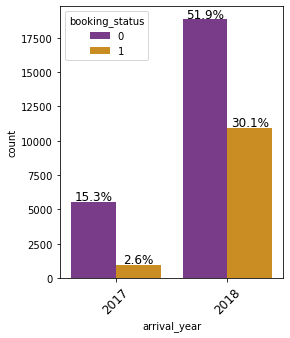

<IPython.core.display.Javascript object>

In [61]:
labeled_barplot_mod(df, "arrival_year", hue="booking_status", perc=True, n=None)

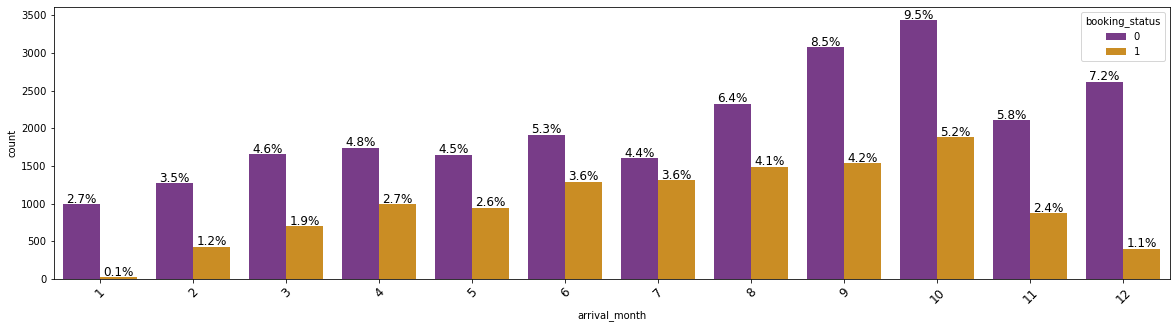

<IPython.core.display.Javascript object>

In [62]:
labeled_barplot_mod(df, "arrival_month", hue="booking_status", perc=True, n=18)

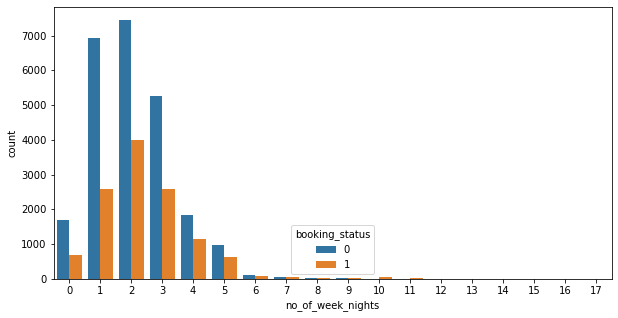

<IPython.core.display.Javascript object>

In [63]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="no_of_week_nights", hue="booking_status")
plt.show()

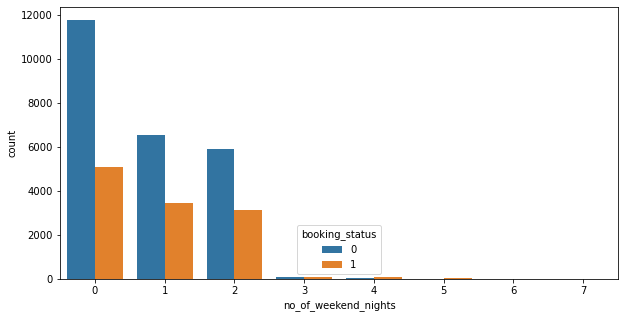

<IPython.core.display.Javascript object>

In [64]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="no_of_weekend_nights", hue="booking_status")
plt.show()

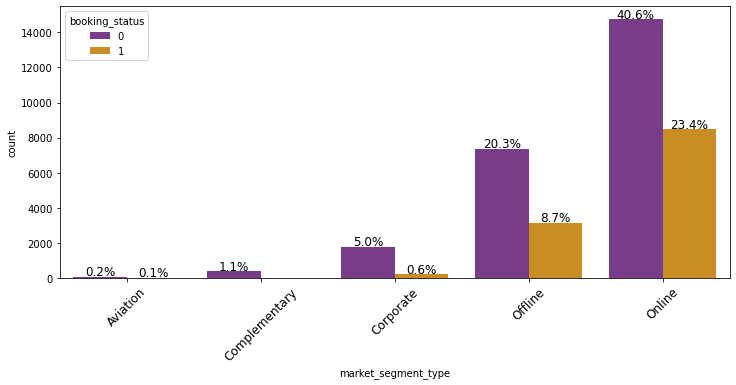

<IPython.core.display.Javascript object>

In [65]:
labeled_barplot_mod(df, "market_segment_type", hue="booking_status", perc=True, n=10)

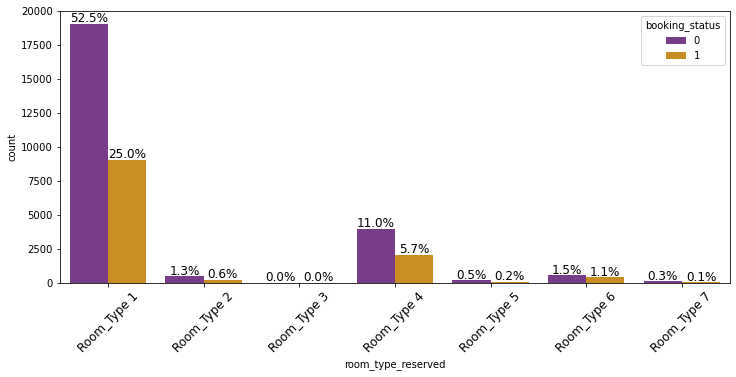

<IPython.core.display.Javascript object>

In [66]:
labeled_barplot_mod(df, "room_type_reserved", hue="booking_status", perc=True, n=10)

<AxesSubplot:xlabel='room_type_reserved', ylabel='count'>

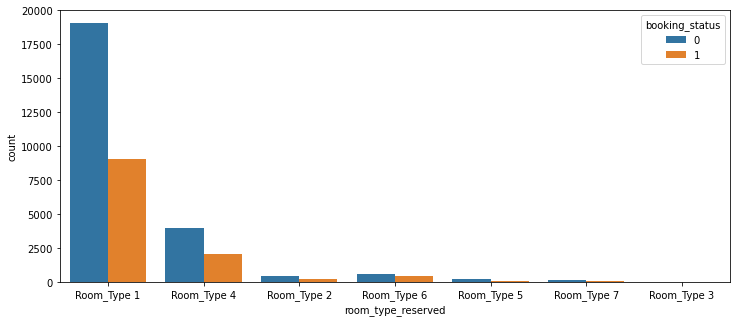

<IPython.core.display.Javascript object>

In [67]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="room_type_reserved", hue="booking_status")

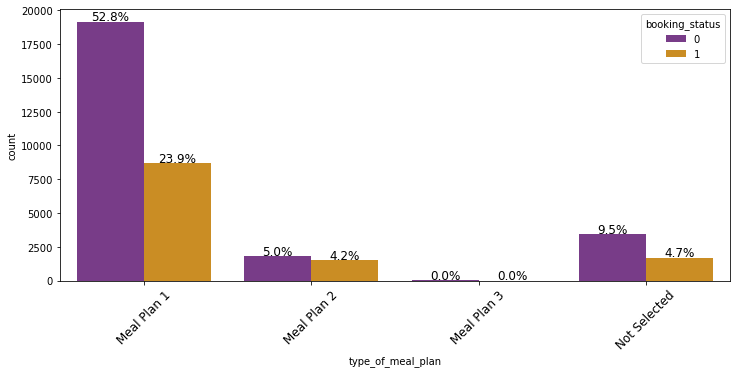

<IPython.core.display.Javascript object>

In [68]:
labeled_barplot_mod(df, "type_of_meal_plan", hue="booking_status", perc=True, n=10)

In [69]:
df.market_segment_type.value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

<IPython.core.display.Javascript object>

In [70]:
df.type_of_meal_plan.value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

<IPython.core.display.Javascript object>

***Most guests are only interested in meal Plan 1 (breakfast) when placing their bookings***

<AxesSubplot:xlabel='market_segment_type', ylabel='count'>

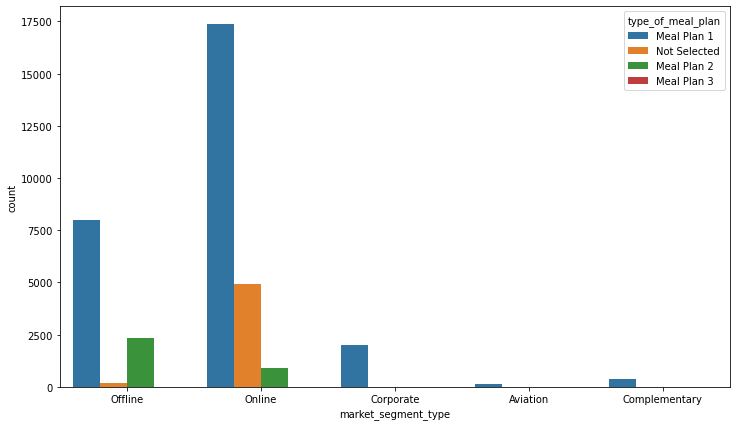

<IPython.core.display.Javascript object>

In [71]:
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x="market_segment_type", hue="type_of_meal_plan")

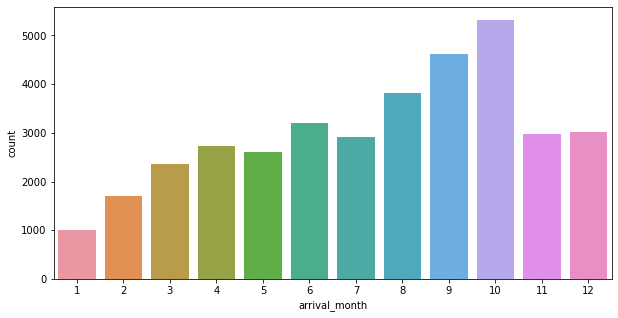

<IPython.core.display.Javascript object>

In [72]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x="arrival_month")
plt.show()

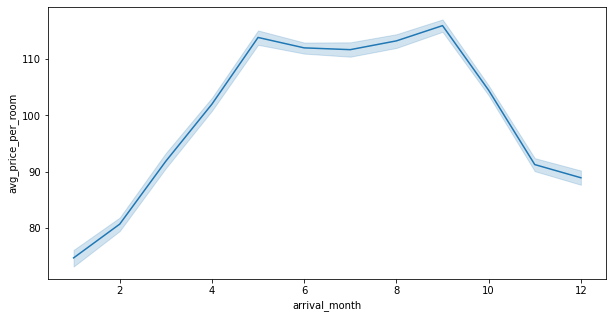

<IPython.core.display.Javascript object>

In [73]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x="arrival_month", y="avg_price_per_room")
plt.show()

***Avg_price_per_room seems to follow the same trend as the arrival_month. There is a gradual increase in price between the month of January and May. Prices from this period is stable, albeit with a slight increase towards mid September, then there is a gradual decrease in prices between late September and December.***

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [74]:
num_columns = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
num_columns

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests',
 'booking_status']

<IPython.core.display.Javascript object>

In [75]:
num_columns.remove("booking_status")

<IPython.core.display.Javascript object>

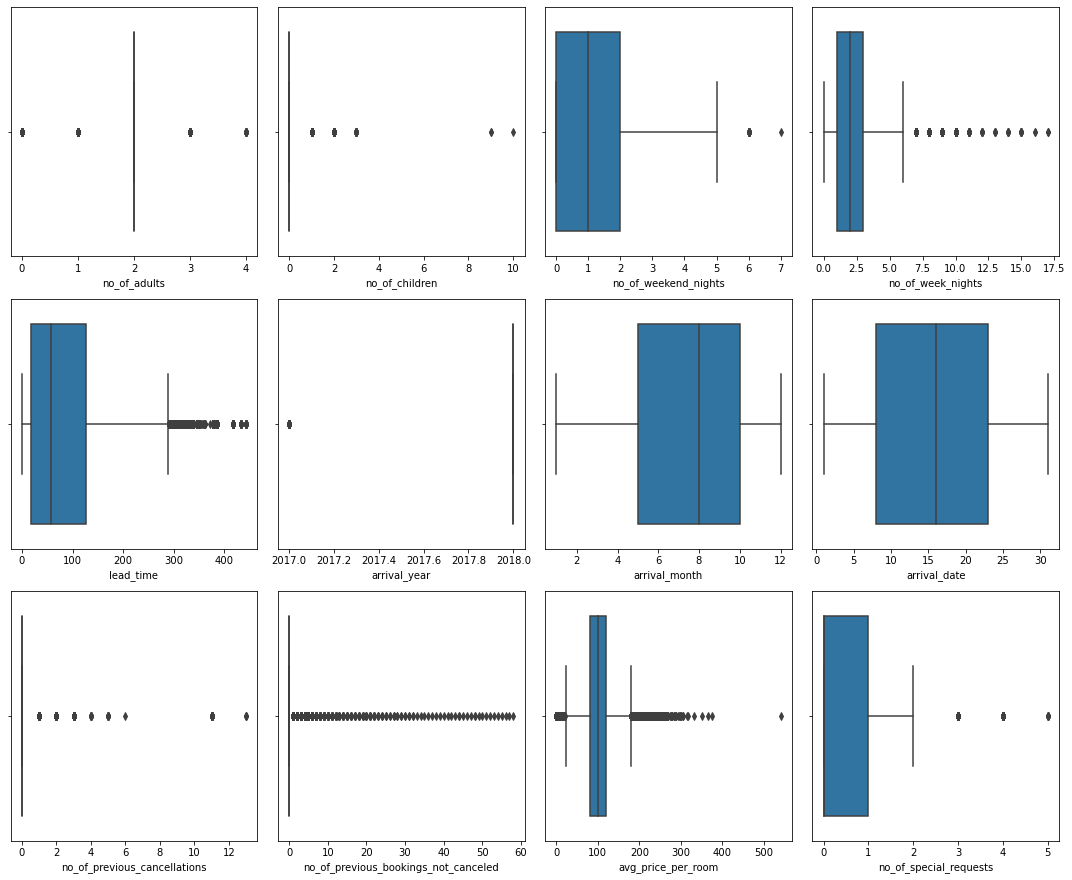

<IPython.core.display.Javascript object>

In [76]:
plt.figure(figsize=(15, 20))

for j, column in enumerate(num_columns):
    plt.subplot(5, 4, j + 1)
    sns.boxplot(data=df, x=column)
    plt.tight_layout()
plt.show()

### Observations
There are outliers in all the columns plotted except the arrival month, and arrival date columns. But since these outliers are actually real values and dropping them is bound to lead to loss of important information, I choose to leave them as they are.

#### Preparing data for modeling

* We want to predict which bookings are likely to be canceled and identify factors factors that have a high influence on booking cancellations.
* Before we proceed to build a model, we will encode the categorical variables.
* We'll split the data into train and test set to be able to evaluate the model that we build on the train data
* We will build a Logistic Regression model using the train data and then check it's performance with the test data.

In [77]:
# Identifying the categorical variables
cat_columns = df.select_dtypes(include=["object"]).columns.tolist()
cat_columns

['type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'market_segment_type',
 'repeated_guest']

<IPython.core.display.Javascript object>

In [78]:
# defining X and y variables
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

<IPython.core.display.Javascript object>

In [79]:
# Adding a constant to the X variables
X = sm.add_constant(X)

<IPython.core.display.Javascript object>

In [80]:
# creating dummies for X from the categorical variables
X = pd.get_dummies(X, cat_columns, drop_first=True)

<IPython.core.display.Javascript object>

In [81]:
# Splitting data to train and test sets in the ratio 70:30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [82]:
X_train.shape

(25392, 28)

<IPython.core.display.Javascript object>

In [83]:
X_test.shape

(10883, 28)

<IPython.core.display.Javascript object>

In [84]:
y_train.shape

(25392,)

<IPython.core.display.Javascript object>

In [85]:
y_train.value_counts()

0    17029
1     8363
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

In [86]:
y_test.value_counts()

0    7361
1    3522
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

## EDA

- It is a good idea to explore the data once again after manipulating it.

#### No manipulation was done to the data set, therefore there is no need for another EDA

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [87]:
# function to check VIF.


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [88]:
# checking VIF on train data
checking_vif(X_train)

,feature,VIF
0,const,39468156.70600
1,no_of_adults,1.34815
2,no_of_children,1.97823
3,no_of_weekend_nights,1.06948
4,no_of_week_nights,1.09567
5,lead_time,1.39491
6,arrival_year,1.43083
7,arrival_month,1.27567
8,arrival_date,1.00674
9,no_of_previous_cancellations,1.39569


<IPython.core.display.Javascript object>

### Observation
* There are three columns with very high VIF values, indicating presence of strong multicollinearity. These columns are: 1)market_segment_type_Corporate, 2)market_segment_type_Offline, and 3)market_segment_type_Online 	
* We can proceed to treat this by dropping the columns with the highest VIF value, one after the other, starting with "market_segment_type_Online", being the predictor variable with the highest VIF.

In [89]:
col_to_drop = "market_segment_type_Online"
X_train1 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test1 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

<IPython.core.display.Javascript object>

In [90]:
X_train1.shape

(25392, 27)

<IPython.core.display.Javascript object>

In [91]:
# checking VIF on train data
checking_vif(X_train1)

,feature,VIF
0,const,39391371.31459
1,no_of_adults,1.33178
2,no_of_children,1.97735
3,no_of_weekend_nights,1.06904
4,no_of_week_nights,1.09512
5,lead_time,1.39064
6,arrival_year,1.42838
7,arrival_month,1.27463
8,arrival_date,1.00672
9,no_of_previous_cancellations,1.39545


<IPython.core.display.Javascript object>

### Observation
No multicolinearity between the X variables after dropping the "market_segment_type_Online" column

## Building a Logistic Regression model

### Model building and evaluation criteria

1. Models can make right predictions by predicting that:
    * A customer will cancel their booking and they did cancel (True Positive)
    * A customer will not cancel his/her booking and they did not cancel (True Negative)
* Remember: Cancelled - 1, Not cancelled - 0    

2. Models can also make wrong predictions by predicting that:
    * A customer will cancel his/her booking but in reality, the customer did not cancel (False positive)
    * A customer will not cancel his/her booking but they actually did cancel (False negative)
   

In the case at hand, we want to minimise false positives and false negatives as much as posible, because:
* a) If our model predicts that a booking will not be cancelled, and it is cancelled, the hotel loses revenue on two fronts. Resources deployed to cater for a customer that refuses to show up and the lost revenue that should have accrued from a customer actually taking up occupancy in the hotel.
* b) If our model predicts that a booking will be cancelled and the customer decides to show up, we would have failed to make adequate arrangement for his/her arrival and the reputaion of the hotel suffers in the process.

For the two reasons above, we will choose the F1 score as our metric of performance measurement. Maximising the F1 score will minimise both false positives and false negatives.

#### We proceed by creating functions to calculate the different metrics and the confusion matrix 

In [92]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [93]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

#### Bulding the model

In [94]:
# Building the logistic regression model and printing the summary
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit()

print(lg1.summary())

         Current function value: 0.425084
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Fri, 17 Feb 2023   Pseudo R-squ.:                  0.3292
Time:                        13:13:22   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -933.3324    120.655     -7.736      0.000   -1169.813

<IPython.core.display.Javascript object>

#### Print the Training performance

In [95]:
# Print the training performance
model_performance_classification_statsmodels(lg1, X_train1, y_train)

,Accuracy,Recall,Precision,F1
0,0.80577,0.63374,0.73929,0.68246


<IPython.core.display.Javascript object>

### Observations

* Negative values of the coefficient shows that the probability of a booking being cancelled decreases with the increase of corresponding attribute value.

* Positive values of the coefficient shows that the probability of a booking being cancelled increases with the increase of corresponding attribute value.

* p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.
  
* We observe that quite a few of our predictor variables have p_values greater than 0.05, therefore these variables do not significantly impact the target variable. 

* We will therefore proceed to drop them, one after the other. The variable with the highest p_value will be dropped first. 

#### Dropping columns with high p_values

In [96]:
# initial list of columns
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'required_car_parking_space_Yes', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'repeated_guest_Yes']


<IPython.core.display.Javascript object>

In [97]:
X_train2 = X_train1[selected_features]
X_test2 = X_test1[selected_features]

<IPython.core.display.Javascript object>

In [98]:
# Building the new logistic regression model and printing its summary
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit()
print(lg2.summary())

Optimization terminated successfully.
         Current function value: 0.425677
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Fri, 17 Feb 2023   Pseudo R-squ.:                  0.3283
Time:                        13:13:23   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -917.2860    120.456     -7.615    

<IPython.core.display.Javascript object>

#### Coefficient interpretations

* Coefficients of no_of_adults, weekend_nights, and no_of previous_cancellations are positive. These implies that an increase in the value of these variables will lead to an increase in the chances of a booking being cancelled.
* Coefficient of no_of_special request is negative, therefore an increase in this value will lead to a decrease in the probability of a booking being cancelled
* Coefficients of repeated_guest and required_car_parking_space are negative, this implies that when a customer is a repeated guest or when a customer requests for a parking space for his/her car, the probability of the booking being cancelled decreases.

## Model performance evaluation

### Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**



In [99]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,required_car_parking_space_Yes,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline,repeated_guest_Yes
Odds,0.00000,1.11475,1.16436,1.11475,1.04264,1.01584,1.57324,0.95853,1.25716,1.01935,0.22994,1.17992,1.33089,0.20305,0.70046,0.75383,0.47940,0.38099,0.23903,0.45258,0.16750,0.06480
Change_odd%,-100.00000,11.47536,16.43601,11.47526,4.26363,1.58352,57.32351,-4.14725,25.71567,1.93479,-77.00595,17.99156,33.08924,-79.69523,-29.95389,-24.61701,-52.05967,-61.90093,-76.09669,-54.74162,-83.24963,-93.52026


<IPython.core.display.Javascript object>

### Interpretations

* `no_of_adults`: keeping all other features constant, a unit change in no_of_adults will increase the odds of a booking being cancelled by 1.115 times or an 11.48% increase in the odds. 

* `no_of_previous_cancellations`: keeping all other features constant, a unit change in no_of_previous_cancellations will increase the odds of a booking being cancelled by 1.257 times or an 25.71% increase in the odds. 

* `no_of_special_requests`: keeping all other features constant, a unit change in no_of_special_requests will decrease the odds of a booking being cancelled by 0.23 times or a 77% decrease in the odds.

* `repeated_guest`: keeping all other features constant, when a customer is a repeated_guest, the odds of this customer cancelling his/her booking decreases by 0.065 times or a 93.52% decrease in the odds 


#### Checking model performance on the training set

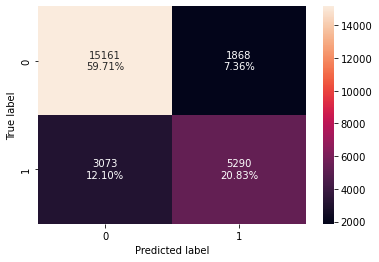

<IPython.core.display.Javascript object>

In [100]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train)

In [101]:
# Calculate and Print the training performance
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg2, X_train2, y_train
)
print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80541,0.63255,0.73903,0.68166


<IPython.core.display.Javascript object>

#### Checking model performance on the test set

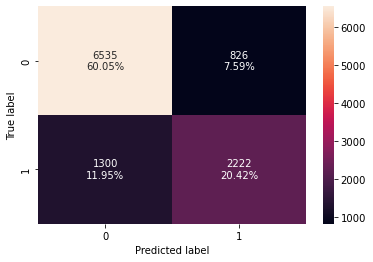

<IPython.core.display.Javascript object>

In [102]:
# creating the confusion matrix of the test set
confusion_matrix_statsmodels(lg2, X_test2, y_test)

In [103]:
# Calculate and Print the test performance
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test2, y_test
)
print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


<IPython.core.display.Javascript object>

### Model Performance Improvement

* The model gives an F1 score of 0.68166 and 0.67641 on the train and test sets respectively
* since the train and test performances are similar, we can safely conclude that the model is not overfitting
* we will try to improve the F1 score by changing the model threshold. 
* We will start by first checking the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
* Next, we will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is F1_score

#### ROC-AUC

* ROC-AUC on training set

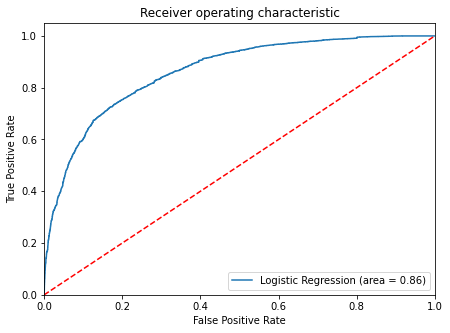

<IPython.core.display.Javascript object>

In [104]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Optimal threshold using AUC-ROC curve

In [105]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr (True Positive Rate) is high and fpr (False Positive Rateis low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3710466623489539


<IPython.core.display.Javascript object>

**Checking model performance on the training set**

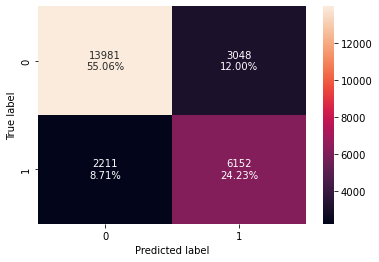

<IPython.core.display.Javascript object>

In [106]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [107]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79289,0.73562,0.66870,0.70056


<IPython.core.display.Javascript object>

**Checking model performance on the test set**

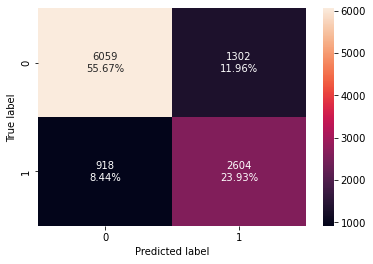

<IPython.core.display.Javascript object>

In [108]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [109]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79601,0.73935,0.66667,0.70113


<IPython.core.display.Javascript object>

#### Using the Precision-Recall curve

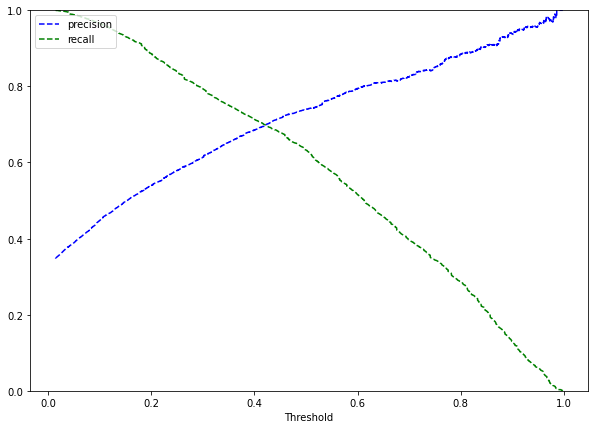

<IPython.core.display.Javascript object>

In [110]:
y_scores = lg2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* We will get equal precision and recall at a threshold around 0.42 

In [111]:
# setting the threshold
optimal_threshold_curve = 0.42

<IPython.core.display.Javascript object>

**Checking model performance on the training set**

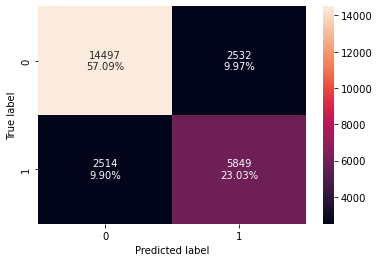

<IPython.core.display.Javascript object>

In [112]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train2, y_train, threshold=optimal_threshold_curve)

In [113]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80128,0.69939,0.69789,0.69864


<IPython.core.display.Javascript object>

**Checking model performance on the test set**

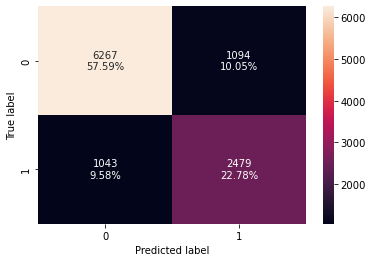

<IPython.core.display.Javascript object>

In [114]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test2, y_test, threshold=optimal_threshold_curve)

In [115]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80364,0.70386,0.69381,0.69880


<IPython.core.display.Javascript object>

## Final Model Summary

In [116]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80541,0.79289,0.80128
Recall,0.63255,0.73562,0.69939
Precision,0.73903,0.66870,0.69789
F1,0.68166,0.70056,0.69864


<IPython.core.display.Javascript object>

In [117]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80465,0.79601,0.80364
Recall,0.63089,0.73935,0.70386
Precision,0.72900,0.66667,0.69381
F1,0.67641,0.70113,0.69880


<IPython.core.display.Javascript object>

- All the three models performed well on both the training and test data without the problem of overfitting.
- Nevertheless, the model with a logistic regression threshold of 0.37 gives the best performance on the F1 score which is our chosen metric for measuring performance for the stated problem scenario, We will therefore use it as our final model.

## Building a Decision Tree model

#### Data preparation for Decision Tree model

In [118]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,No,Room_Type 1,224,2017,10,2,Offline,No,0,0,65.00000,0,0
1,2,0,2,3,Not Selected,No,Room_Type 1,5,2018,11,6,Online,No,0,0,106.68000,1,0
2,1,0,2,1,Meal Plan 1,No,Room_Type 1,1,2018,2,28,Online,No,0,0,60.00000,0,1
3,2,0,0,2,Meal Plan 1,No,Room_Type 1,211,2018,5,20,Online,No,0,0,100.00000,0,1
4,2,0,1,1,Not Selected,No,Room_Type 1,48,2018,4,11,Online,No,0,0,94.50000,0,1


<IPython.core.display.Javascript object>

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  object 
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

<IPython.core.display.Javascript object>

In [120]:
df.shape

(36275, 18)

<IPython.core.display.Javascript object>

In [121]:
X = df.drop(["booking_status"], axis=1)
Y = df["booking_status"]

<IPython.core.display.Javascript object>

In [122]:
# create dummies for the categorical variables in X
X = pd.get_dummies(X, cat_columns, drop_first=True)
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,required_car_parking_space_Yes,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,repeated_guest_Yes
0,2,0,1,2,224,2017,10,2,0,0,65.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,0,2,3,5,2018,11,6,0,0,106.68000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,2,1,1,2018,2,28,0,0,60.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2,0,0,2,211,2018,5,20,0,0,100.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,0,1,1,48,2018,4,11,0,0,94.50000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [123]:
# Splitting data into train and test sets in the ratio 70:30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [124]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 25392
Number of rows in test data = 10883


<IPython.core.display.Javascript object>

In [125]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("=" * 40)
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

### Build Decision Tree Model

In [126]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

### Model performance evaluation

As mentioned in the logistic regresection section, our model can make wrong predictions by predicting that:
   * A customer will cancel his/her booking but in reality, the customer did not cancel (False positive)
   * A customer will not cancel his/her booking but they actually did cancel (False negative)
    
The best interest of the business will be catered for by keeping false positives and false negatives to a minimum at the same time. We have therefore chosen the F1 score as our metric of performance measurement. Maximising the F1 score will minimise both false positives and false negatives   
 

In [127]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [128]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

#### Checking model performance on the training set

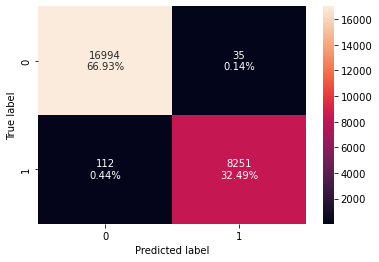

<IPython.core.display.Javascript object>

In [129]:
# create tghe confusion matrix for train data
confusion_matrix_sklearn(model, X_train, y_train)

In [130]:
# Calculate the different performance metrics for the training set
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


<IPython.core.display.Javascript object>

#### Checking model performance on test set

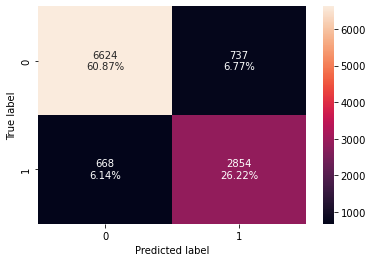

<IPython.core.display.Javascript object>

In [131]:
# create tghe confusion matrix for test data
confusion_matrix_sklearn(model, X_test, y_test)

In [132]:
# Calculate the different performance metrics for the test set
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.87090,0.81034,0.79476,0.80247


<IPython.core.display.Javascript object>

#### Observation
* The performance metrics on the training set are very high (approximately 1)
* The performance metrics on the test data seems okay, but there is a large disparity between it and that of the training data
* The difference noted in the two sets of performance metrics is likely due to the complexity of the decision tree created which suggests that our model may be overfitted.


#### Visualizing the Decision Tree

In [133]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'required_car_parking_space_Yes', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online', 'repeated_guest_Yes']


<IPython.core.display.Javascript object>

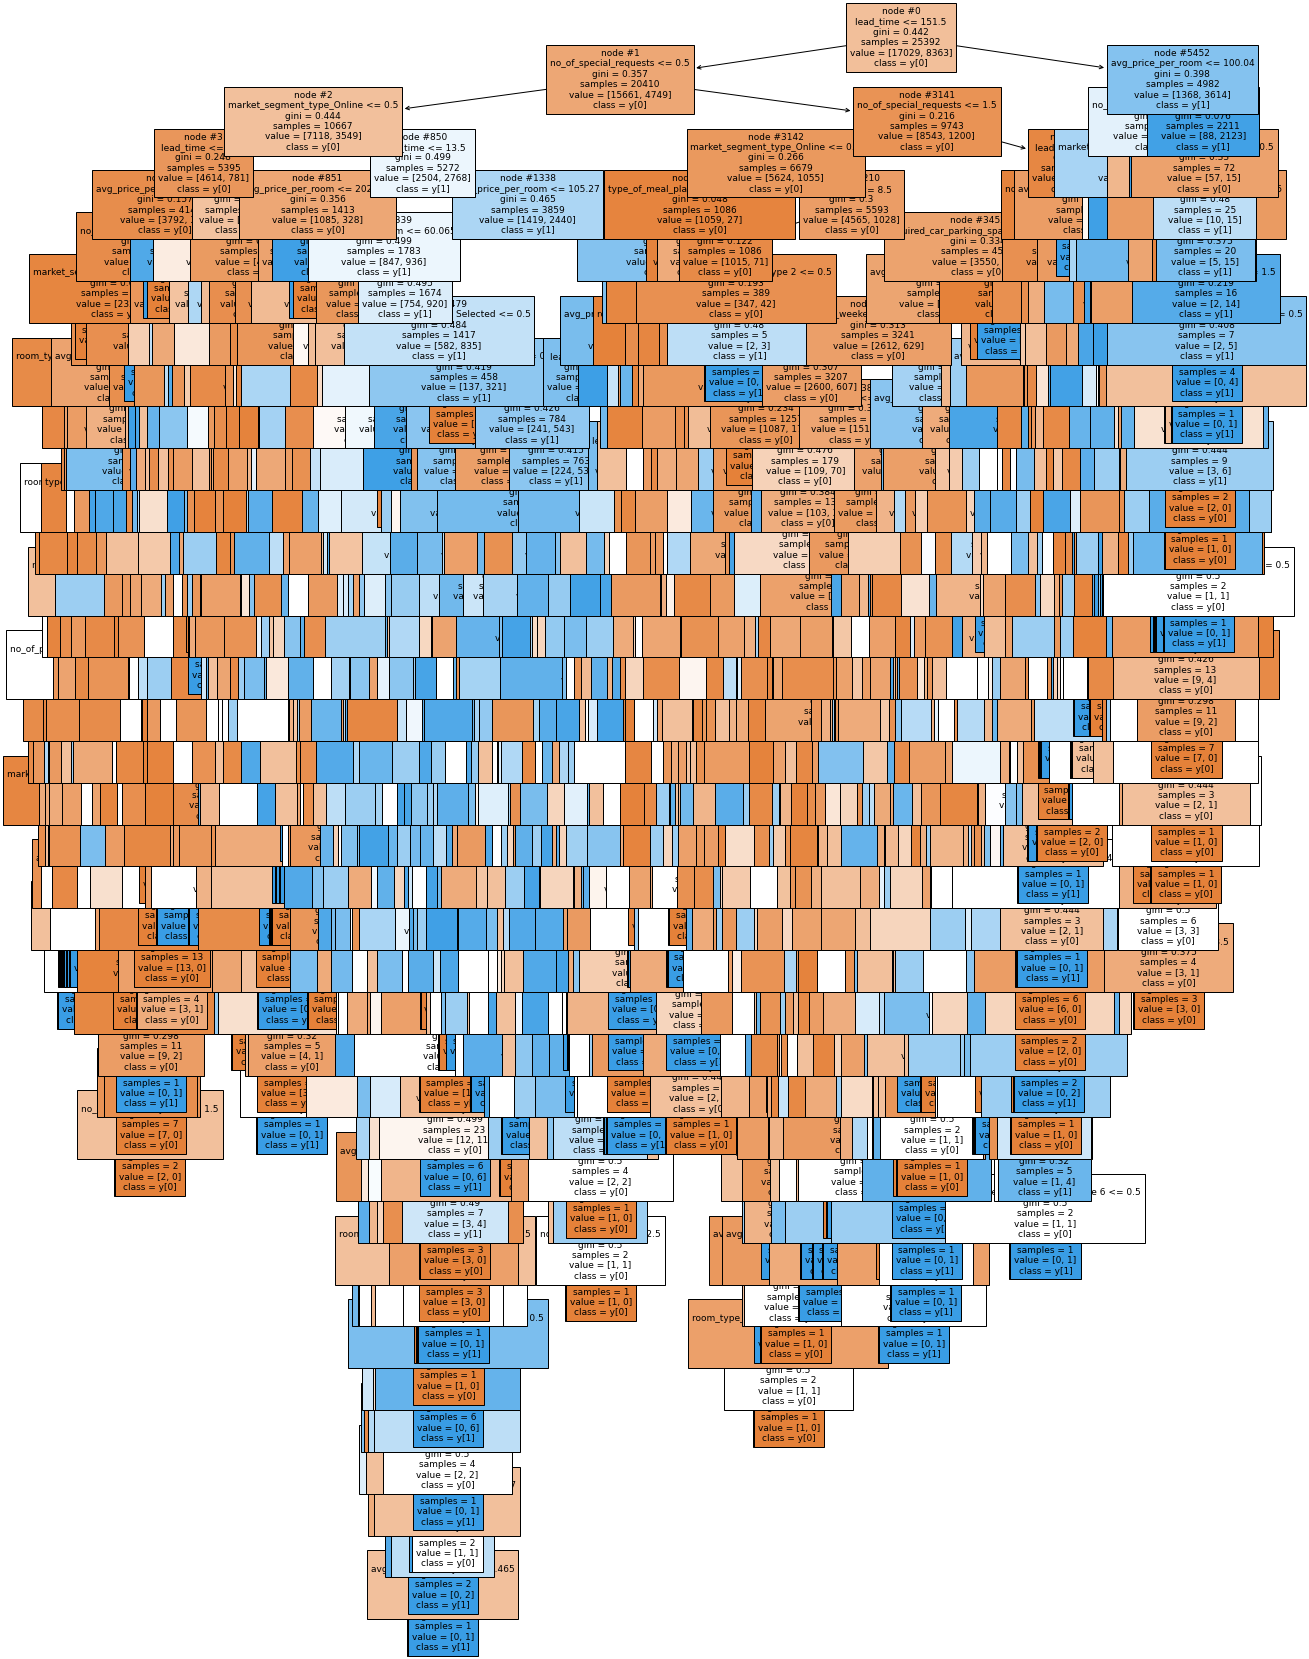

<IPython.core.display.Javascript object>

In [134]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [135]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest_Yes <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- repeated_guest_Yes >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [147.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- room_type_reserved_R

<IPython.core.display.Javascript object>

In [136]:
# Printing the Gini importance of the predictor variables
print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                         Imp
lead_time                            0.35225
avg_price_per_room                   0.17530
market_segment_type_Online           0.09247
arrival_date                         0.08556
no_of_special_requests               0.06797
arrival_month                        0.06395
no_of_week_nights                    0.04344
no_of_weekend_nights                 0.04112
no_of_adults                         0.02656
arrival_year                         0.01192
type_of_meal_plan_Not Selected       0.00757
room_type_reserved_Room_Type 4       0.00719
required_car_parking_space_Yes       0.00714
type_of_meal_plan_Meal Plan 2        0.00391
no_of_children                       0.00372
market_segment_type_Offline          0.00360
room_type_reserved_Room_Type 2       0.00191
room_type_reserved_Room_Type 5       0.00179
room_type_reserved_Room_Type 6       0.00077
market_segment_type_Corporate        0.00071
repeated_guest_Yes                   0.00051
no_of_prev

<IPython.core.display.Javascript object>

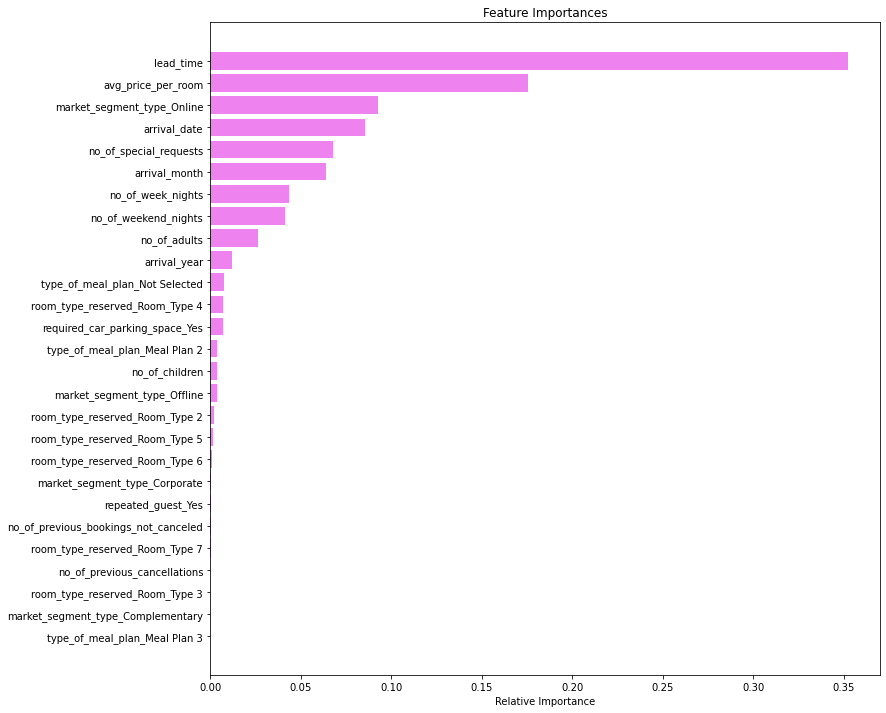

<IPython.core.display.Javascript object>

In [137]:
# level of importance of the predictor variables
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, lead_time, followed by ave_price_of_room are most important variable for predicting whether a booking will be cancelled or not.

## Do we need to prune the tree?

* The tree above is very complex, such a tree often overfits, hence the tree need to be pruned

### Decision Tree (Pre-pruning)

***To pre prune our tree, we will use two different methods***

### Method 1
* start by making sure that the decision tree does not become biased toward the dominant classes by specifying the class_weight hyperparameter as balanced, and setting the max_depth of the tree to 5

In [138]:
model1 = DecisionTreeClassifier(random_state=1, max_depth=5, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on the training set

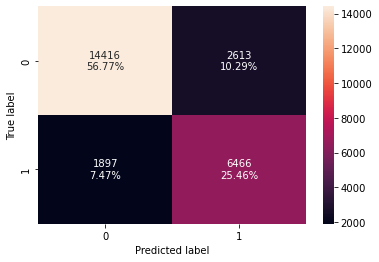

<IPython.core.display.Javascript object>

In [139]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [140]:
decision_tree_pretune1_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_pretune1_perf_train

,Accuracy,Recall,Precision,F1
0,0.82239,0.77317,0.71219,0.74143


<IPython.core.display.Javascript object>

#### Checking model performance on the test set

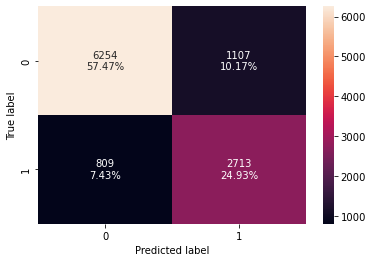

<IPython.core.display.Javascript object>

In [141]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [142]:
decision_tree_pretune1_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_pretune1_perf_test

,Accuracy,Recall,Precision,F1
0,0.82395,0.77030,0.71021,0.73904


<IPython.core.display.Javascript object>

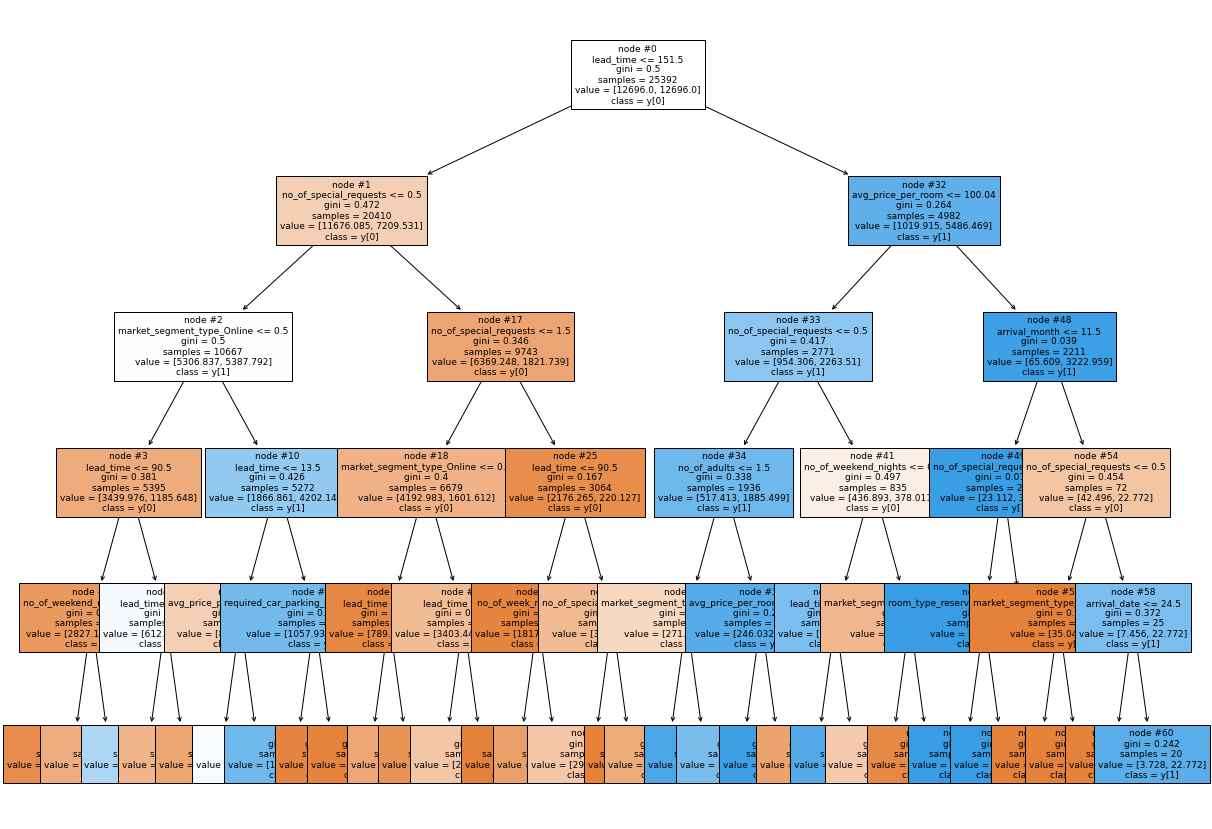

<IPython.core.display.Javascript object>

In [143]:
plt.figure(figsize=(20, 15))

out = tree.plot_tree(
    model1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [144]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model1, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- weights: [1737.14, 157.88] class: 0
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- weights: [1090.00, 384.08] class: 0
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- weights: [297.48, 513.12] class: 1
|   |   |   |   |--- lead_time >  117.50
|   |   |   |   |   |--- weights: [315.37, 130.56] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- lead_time <= 13.50
|   |   |   |   |--- avg_price_per_room <= 99.44
|   |   |   |   |   |--- weights: [456.28, 132.08] class: 0
|   |   |   |   |--- avg_price_per_room >  99.44
|   |   |   |   |   |--- weights: [352.65, 365.87] class: 1
|   |   |   |--- lead_time >  13.50
|   |   |   |   |--- required_car_parking_space_Yes <

<IPython.core.display.Javascript object>

In [145]:
# Printing the Gini importance of the predictor variables
print(
    pd.DataFrame(
        model1.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                         Imp
lead_time                            0.48716
market_segment_type_Online           0.19926
no_of_special_requests               0.17932
avg_price_per_room                   0.05902
no_of_adults                         0.02737
no_of_weekend_nights                 0.02222
required_car_parking_space_Yes       0.00960
arrival_month                        0.00902
no_of_week_nights                    0.00330
market_segment_type_Offline          0.00291
arrival_date                         0.00082
room_type_reserved_Room_Type 2       0.00000
room_type_reserved_Room_Type 6       0.00000
market_segment_type_Corporate        0.00000
room_type_reserved_Room_Type 7       0.00000
market_segment_type_Complementary    0.00000
room_type_reserved_Room_Type 4       0.00000
room_type_reserved_Room_Type 5       0.00000
type_of_meal_plan_Meal Plan 3        0.00000
room_type_reserved_Room_Type 3       0.00000
type_of_meal_plan_Not Selected       0.00000
no_of_chil

<IPython.core.display.Javascript object>

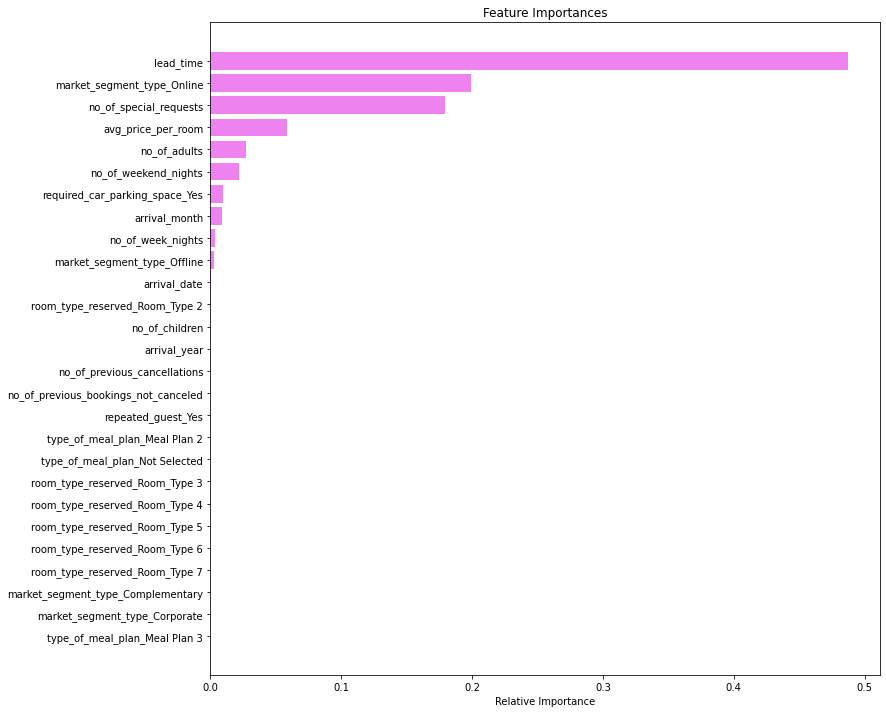

<IPython.core.display.Javascript object>

In [146]:
# level of importance of the predictor variables
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to this decision tree model, the three most important variables for predicting whether a booking will be cancelled or not in order of importance are:

    * 1) lead_time 
    * 2) market_segment_type_online 
    * 3) no_of_special_requests
    

* The model performs creditably well on both the Train and Test data

* But lets see if we can improve the model further by using another method to pre prune the tree.

### Method 2
***Using GridSearch for Hyperparameter tuning of our tree model***

In [147]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "criterion": ["entropy", "gini"],
    "max_depth": np.arange(2, 11, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       max_leaf_nodes=150, min_samples_split=10,
                       random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on the training set

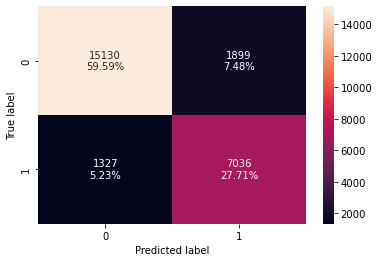

<IPython.core.display.Javascript object>

In [148]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [149]:
decision_tree_pretune2_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_pretune2_perf_train

,Accuracy,Recall,Precision,F1
0,0.87295,0.84132,0.78747,0.81350


<IPython.core.display.Javascript object>

#### Checking model performance on the test set

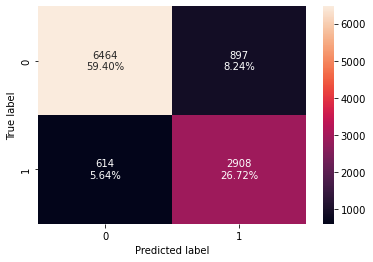

<IPython.core.display.Javascript object>

In [150]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [151]:
decision_tree_pretune2_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_pretune2_perf_test

,Accuracy,Recall,Precision,F1
0,0.86116,0.82567,0.76426,0.79378


<IPython.core.display.Javascript object>

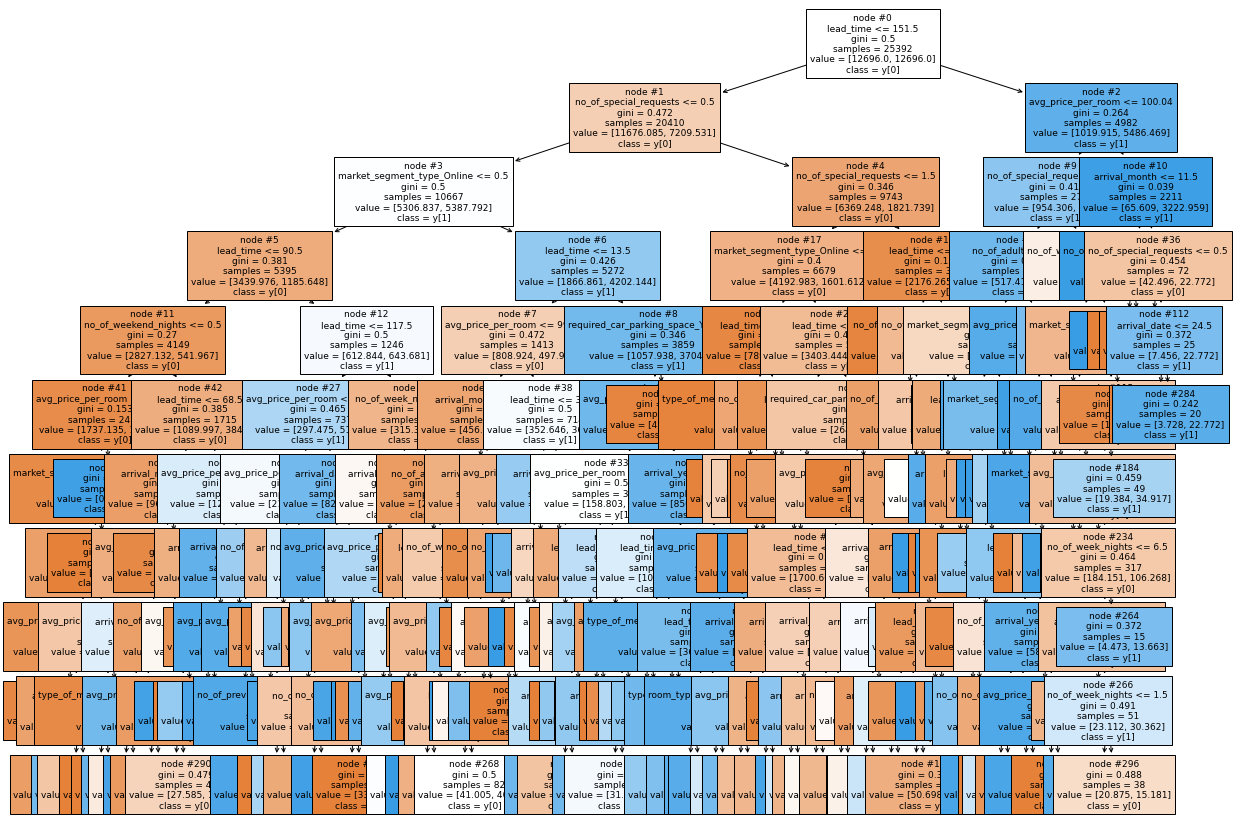

<IPython.core.display.Javascript object>

In [152]:
plt.figure(figsize=(20, 15))

out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [153]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [206.52, 47.06] class: 0
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [2.24, 7.59] class: 1
|   |   |   |   |   |   |   |--- lead_time >  16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 135.00
|   |   |   |   |   |   | 

<IPython.core.display.Javascript object>

In [154]:
# Printing the Gini importance of the predictor variables
print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                         Imp
lead_time                            0.41477
market_segment_type_Online           0.15245
no_of_special_requests               0.13804
avg_price_per_room                   0.11044
arrival_month                        0.04730
no_of_weekend_nights                 0.02479
no_of_adults                         0.02462
no_of_week_nights                    0.02291
arrival_year                         0.02029
arrival_date                         0.01578
market_segment_type_Offline          0.01247
required_car_parking_space_Yes       0.01151
type_of_meal_plan_Not Selected       0.00229
no_of_previous_cancellations         0.00093
type_of_meal_plan_Meal Plan 2        0.00075
room_type_reserved_Room_Type 5       0.00066
room_type_reserved_Room_Type 6       0.00000
market_segment_type_Corporate        0.00000
market_segment_type_Complementary    0.00000
room_type_reserved_Room_Type 7       0.00000
type_of_meal_plan_Meal Plan 3        0.00000
room_type_

<IPython.core.display.Javascript object>

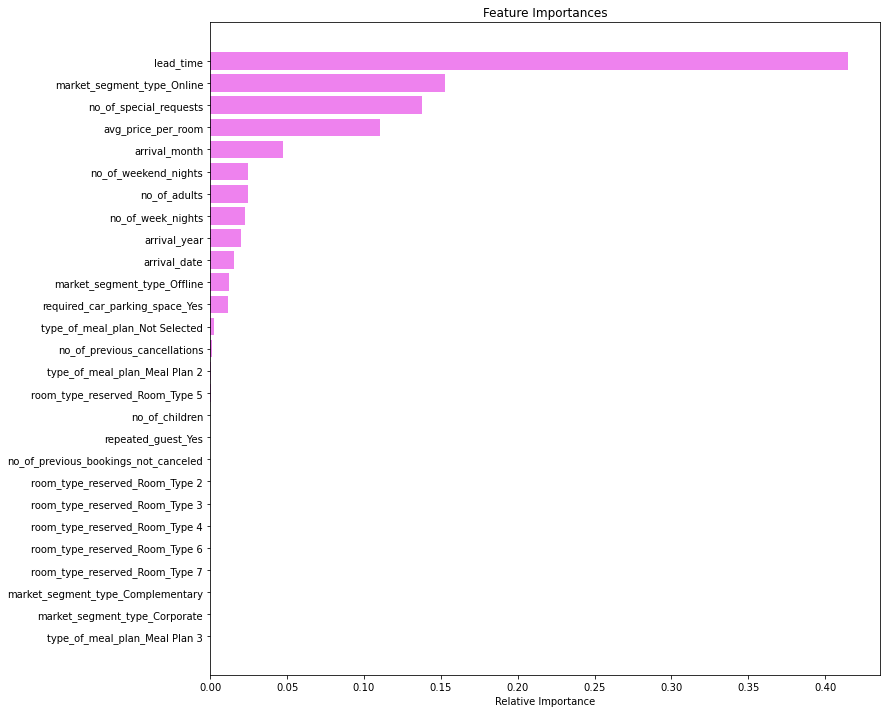

<IPython.core.display.Javascript object>

In [155]:
# level of importance of the predictor variables
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to this decision tree model, the four most important variables for predicting whether a booking will be cancelled or not in order of importance are:

    * 1) lead_time 
    * 2) market_segment_type_online 
    * 3) no_of_special_requests 
    * 4) avg_price_per_room
    

* The model performs creditably well on both the Train and Test data

***We shall now try a Post Pruning method to see if the decision tree could be further improved***

#### Cost Complexity Pruning
* even though the models we got by pre pruning our decision tree both performed well, we'll try and post prune the tree to see if we can get a better result.

In [156]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

<IPython.core.display.Javascript object>

In [157]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1833,0.00890,0.32806
1834,0.00980,0.33786
1835,0.01272,0.35058
1836,0.03412,0.41882


<IPython.core.display.Javascript object>

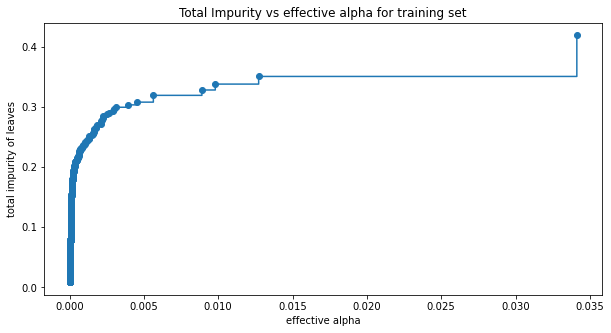

<IPython.core.display.Javascript object>

In [158]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [159]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389137176


<IPython.core.display.Javascript object>

For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

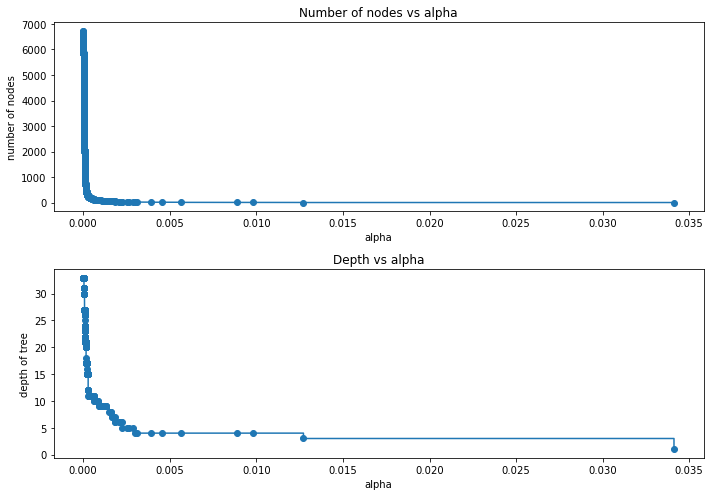

<IPython.core.display.Javascript object>

In [160]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### F1 Score vs alpha for training and testing sets

In [161]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

<IPython.core.display.Javascript object>

In [162]:
f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

<IPython.core.display.Javascript object>

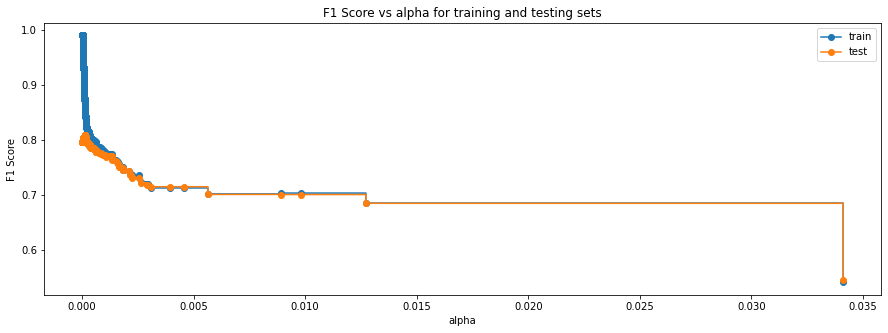

<IPython.core.display.Javascript object>

In [163]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [164]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167032,
                       class_weight='balanced', random_state=1)


<IPython.core.display.Javascript object>

#### Checking performance on training set

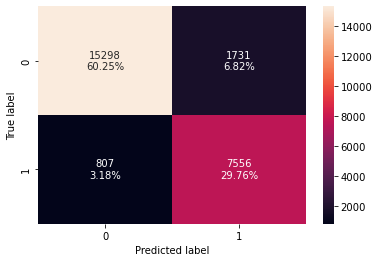

<IPython.core.display.Javascript object>

In [165]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [166]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.90005,0.90350,0.81361,0.85620


<IPython.core.display.Javascript object>

#### Checking performance on test set

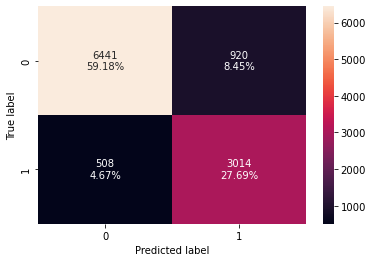

<IPython.core.display.Javascript object>

In [167]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [168]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.86879,0.85576,0.76614,0.80848


<IPython.core.display.Javascript object>

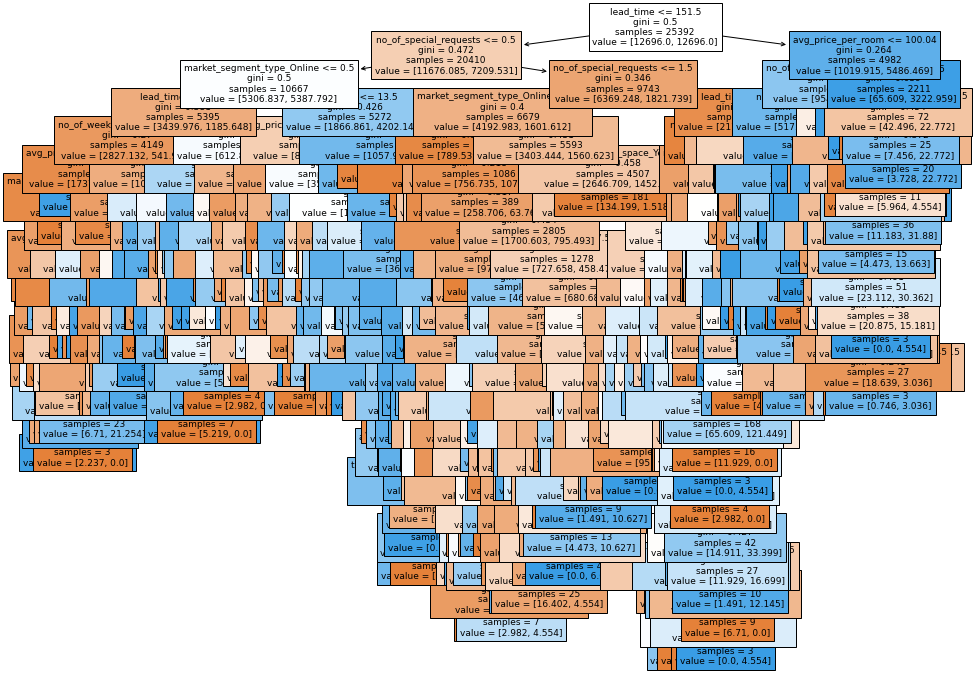

<IPython.core.display.Javascript object>

In [169]:
plt.figure(figsize=(15, 12))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [170]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

<IPython.core.display.Javascript object>

In [171]:
# Printing the Gini importance of the predictor variables
print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                         Imp
lead_time                            0.39285
market_segment_type_Online           0.13423
avg_price_per_room                   0.12439
no_of_special_requests               0.12071
arrival_month                        0.05955
arrival_date                         0.03479
no_of_week_nights                    0.02889
no_of_weekend_nights                 0.02606
no_of_adults                         0.02509
arrival_year                         0.01892
market_segment_type_Offline          0.01161
required_car_parking_space_Yes       0.01006
type_of_meal_plan_Not Selected       0.00546
room_type_reserved_Room_Type 4       0.00190
room_type_reserved_Room_Type 6       0.00096
no_of_previous_bookings_not_canceled 0.00082
room_type_reserved_Room_Type 2       0.00081
market_segment_type_Corporate        0.00077
type_of_meal_plan_Meal Plan 2        0.00066
room_type_reserved_Room_Type 5       0.00058
no_of_children                       0.00056
repeated_g

<IPython.core.display.Javascript object>

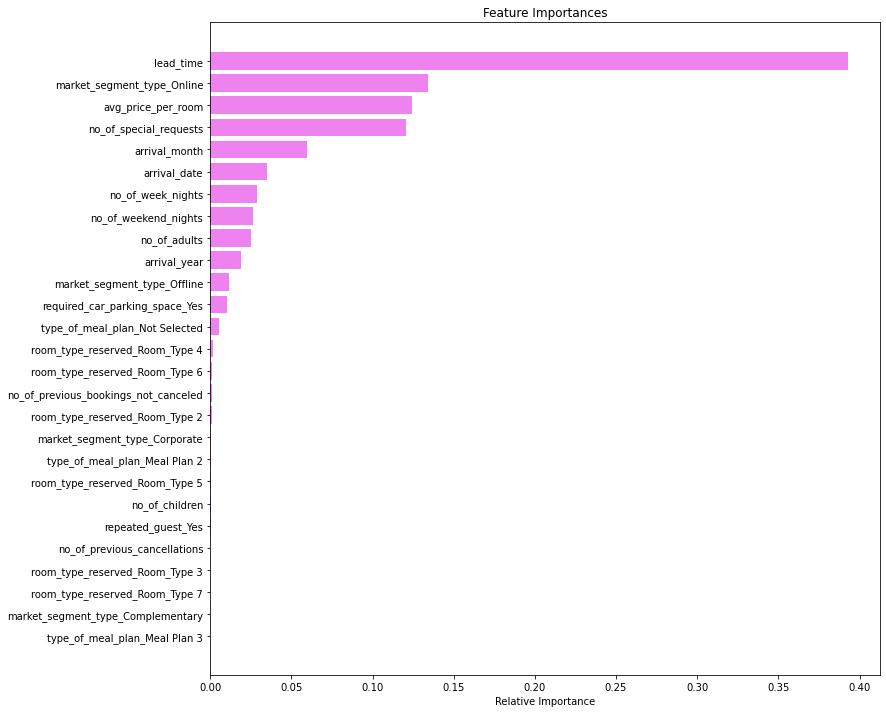

<IPython.core.display.Javascript object>

In [172]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to this decision tree model, the four most important variables for predicting whether a booking will be cancelled or not in order of importance are:

    * 1) lead_time 
    * 2) market_segment_type_online 
    * 3) ave_price_per_room  
    * 4) no_of_special_requests
    

* This model has the best F1 score on both the Train and Test data among the different pruning methods for this tree.

## Model Performance Comparison and Conclusions

In [173]:
# training set performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_pretune1_perf_train.T,
        decision_tree_pretune2_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning1)",
    "Decision Tree (Pre-Pruning2)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning1),Decision Tree (Pre-Pruning2),Decision Tree (Post-Pruning)
Accuracy,0.99421,0.82239,0.87295,0.90005
Recall,0.98661,0.77317,0.84132,0.90350
Precision,0.99578,0.71219,0.78747,0.81361
F1,0.99117,0.74143,0.81350,0.85620


<IPython.core.display.Javascript object>

In [174]:
# test set performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_pretune1_perf_test.T,
        decision_tree_pretune2_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning1)",
    "Decision Tree (Pre-Pruning2)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_test_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning1),Decision Tree (Pre-Pruning2),Decision Tree (Post-Pruning)
Accuracy,0.87090,0.82395,0.86116,0.86879
Recall,0.81034,0.77030,0.82567,0.85576
Precision,0.79476,0.71021,0.76426,0.76614
F1,0.80247,0.73904,0.79378,0.80848


<IPython.core.display.Javascript object>

## Actionable Insights and Recommendations

### Insights

1. Lead_time, market_segment_online, avg_price_per_room and no_of_special_requests are the four most important predictors of whether a booking will be cancelled or not. 

2. Repeated guest and guests who make special requests ane less likely to cancel their bookings.

3. 93% (33742 out of 36275) of bookings comes from the online and offline market segment

4. 94% (34187 out of 36275) of the bookings are for room type1 and type4. 
 
5. Meal plan 3 is rarely chosen by the guests (5 out of 36275 times). Might as well discontinue it and replace it with something else.

6. The months of August, september and October are the busiest for the hotel   



### Recommendations

1. Repeat guests  rarely cancel but the percentage of repeat guests is rather low 2.6% (930 out of 36275) of total bookings.  The hotel management should introduce a loyalty package with attractive incentives to get this number up. 

2. The longer the time between booking and arrival (lead_time), the more likely is the booking to be cancelled. To minimise incidents of cancellation, management is advised to make room rates booked into the future more attractive (like lower prices) but subject to a non-refundable deposit when booking with a lead time greater than 60 days (median lead_time is 57 days).

3. Management should look for ways of taking advantage of the higher patronage in the months of August to October with a view to maximising profit during these months. It may even be something as counter intuitive like a slight decrease in prices to see if it will drive up the occupancy rate further, discount for longer occupancy. It may also be an outright increase (small, nothing drastic) in the room prices. We may need to carry out further investigation on the data to see which of these will be most favourable. At the same time, we should not neglect the so called lean months. Incentives such as promos could help in driving up the occupany figures during these months also.
